In [1]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
dfm = pd.read_csv('/Users/wangziwen/Documents/Graduation/1st/Statistic Learning/project/marketdata_sample.csv')
dfn = pd.read_csv('/Users/wangziwen/Documents/Graduation/1st/Statistic Learning/project/news_sample.csv')

# [market data](https://www.kaggle.com/c/two-sigma-financial-news/data)

首先列出第一笔数据，大致来看下数据的样子

In [3]:
display(dfm.iloc[1,:])

time                        2007-02-01 22:00:00+00:00
assetCode                                       AAI.N
assetName                        AirTran Holdings Inc
universe                                          0.0
volume                                      2051600.0
close                                           11.12
open                                            11.08
returnsClosePrevRaw1                         0.004517
returnsOpenPrevRaw1                         -0.007168
returnsClosePrevMktres1                           NaN
returnsOpenPrevMktres1                            NaN
returnsClosePrevRaw10                       -0.078708
returnsOpenPrevRaw10                        -0.088066
returnsClosePrevMktres10                          NaN
returnsOpenPrevMktres10                           NaN
returnsOpenNextMktres10                      0.027803
Name: 1, dtype: object

经历过初步探索和了解后，转换下数据:
- index: `time`
- object: `assetCode` & `assetName` (2)
- category: `universe` (1)
- float: else (13)
   
   
注意到`returnsClosePrevMktres1`,`returnsOpenPrevMktres1`,`returnsClosePrevMktres10`,`returnsOpenPrevMktres10`全部为空值

In [5]:
dfm.time.describe() #object;only on 2007-02-01 22:00
dfm['time'] = pd.to_datetime(dfm.time, format='%Y-%m-%d %H')
dfm['time'] = dfm["time"].dt.strftime('%Y-%m-%d %H:%M')
dfm['time'] = pd.to_datetime(dfm.time, format='%Y-%m-%d %H')
dfm.set_index('time',inplace = True)
dfm['universe'] = dfm.universe.astype('category')
dfm.info() #1 datetime, 2 object, 13 float 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2007-02-01 22:00:00 to 2007-02-01 22:00:00
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   assetCode                 100 non-null    object  
 1   assetName                 100 non-null    object  
 2   universe                  100 non-null    category
 3   volume                    100 non-null    float64 
 4   close                     100 non-null    float64 
 5   open                      100 non-null    float64 
 6   returnsClosePrevRaw1      100 non-null    float64 
 7   returnsOpenPrevRaw1       100 non-null    float64 
 8   returnsClosePrevMktres1   0 non-null      float64 
 9   returnsOpenPrevMktres1    0 non-null      float64 
 10  returnsClosePrevRaw10     100 non-null    float64 
 11  returnsOpenPrevRaw10      100 non-null    float64 
 12  returnsClosePrevMktres10  0 non-null      float64 
 13  returnsOpenPr

## time
完整的数据会有2007~2016年，都是在每一天的22:00撷取数据，此sample采用2007-02-01 22:00的数据

In [13]:
display(dfm.head(2))

,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
time,,,,,,,,,,,,,,,
2007-02-01 22:00:00,A.N,Agilent Technologies Inc,1.0,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672
2007-02-01 22:00:00,AAI.N,AirTran Holdings Inc,0.0,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803


## assetCode & assetName
- a single company may have multiple assetCodes
- "Unknown" if the corresponding assetCode does not have any rows in the news data   
这笔数据刚好`assetCodes`和`assetName`是一对一关系，下面则展示Unknow

In [15]:
display(dfm[dfm.assetName=='Unknown']) 

,assetCode,assetName,universe,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
time,,,,,,,,,,,,,,,
2007-02-01 22:00:00,ABY.N,Unknown,0.0,9037700.0,3.17,3.23,-0.024615,0.022152,NaN,NaN,0.178439,0.200743,NaN,NaN,0.016963
2007-02-01 22:00:00,AD.N,Unknown,0.0,299100.0,32.80,32.80,0.000610,0.000915,NaN,NaN,0.003058,0.003979,NaN,NaN,0.001977


## universe
应该是category所以我就转换成category type   
indicating whether or not the instrument on that day will be included in scoring(是否可交易)

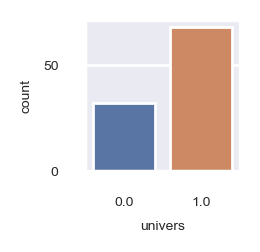

In [71]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(1,1))
sns.countplot(x="universe", data=dfm)
# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)
plt.xlabel('univers', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.show()

## volume 
右偏；trading volume in shares for the day

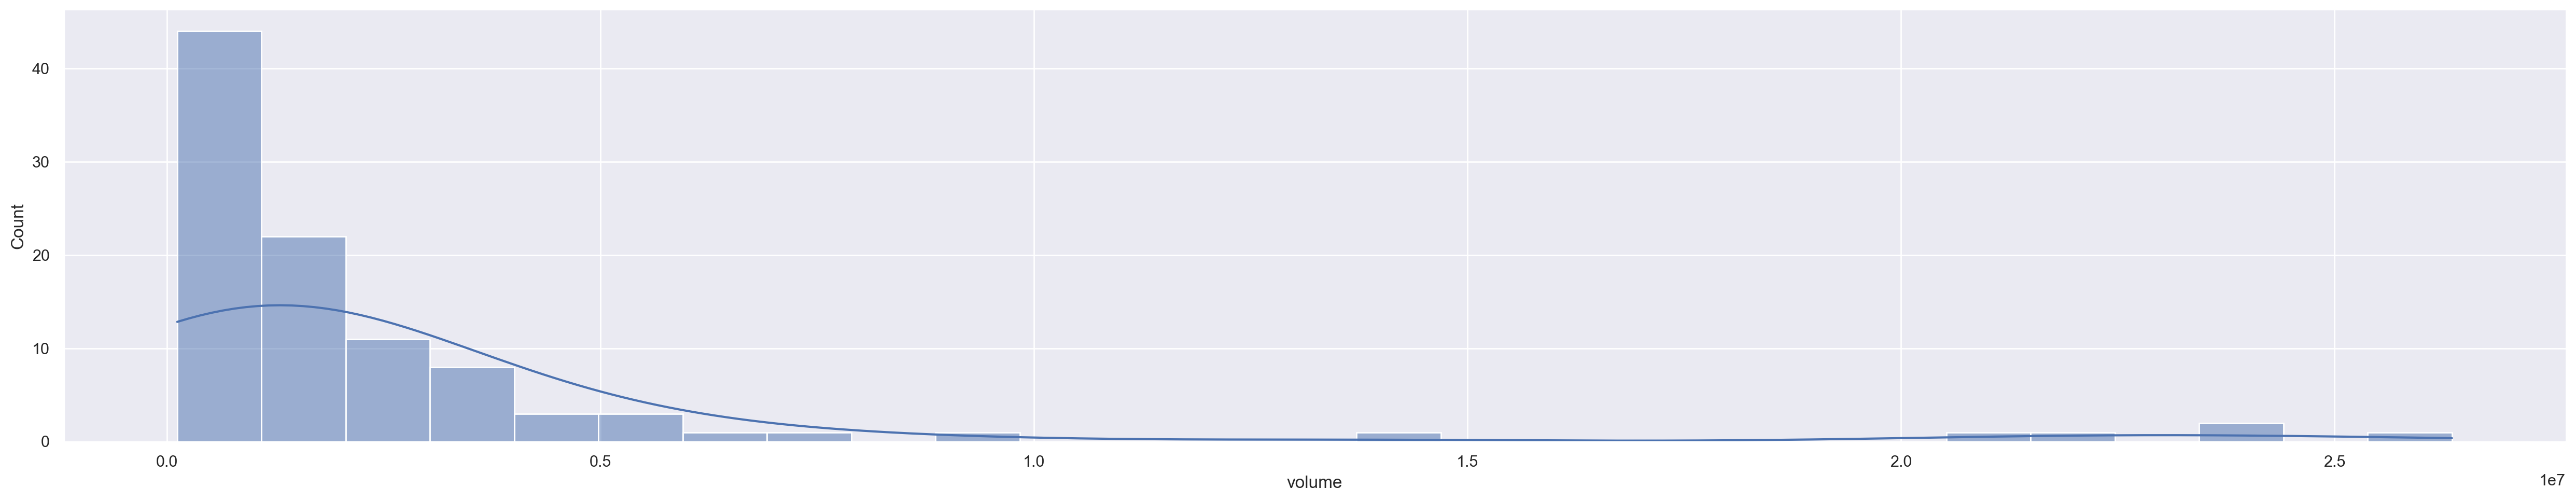

In [44]:
sns.set_theme(style="darkgrid")
sns.displot(data=dfm, x="volume", kde=True,height=5,aspect=5)
plt.show()

## close & open 
正态微右偏；the close/open price for the day (not adjusted for splits or dividends)   
https://money.stackexchange.com/questions/21780/should-i-use-regular-or-adjusted-close-for-backtesting   
https://hk.help.yahoo.com/kb/SLN28256.html    

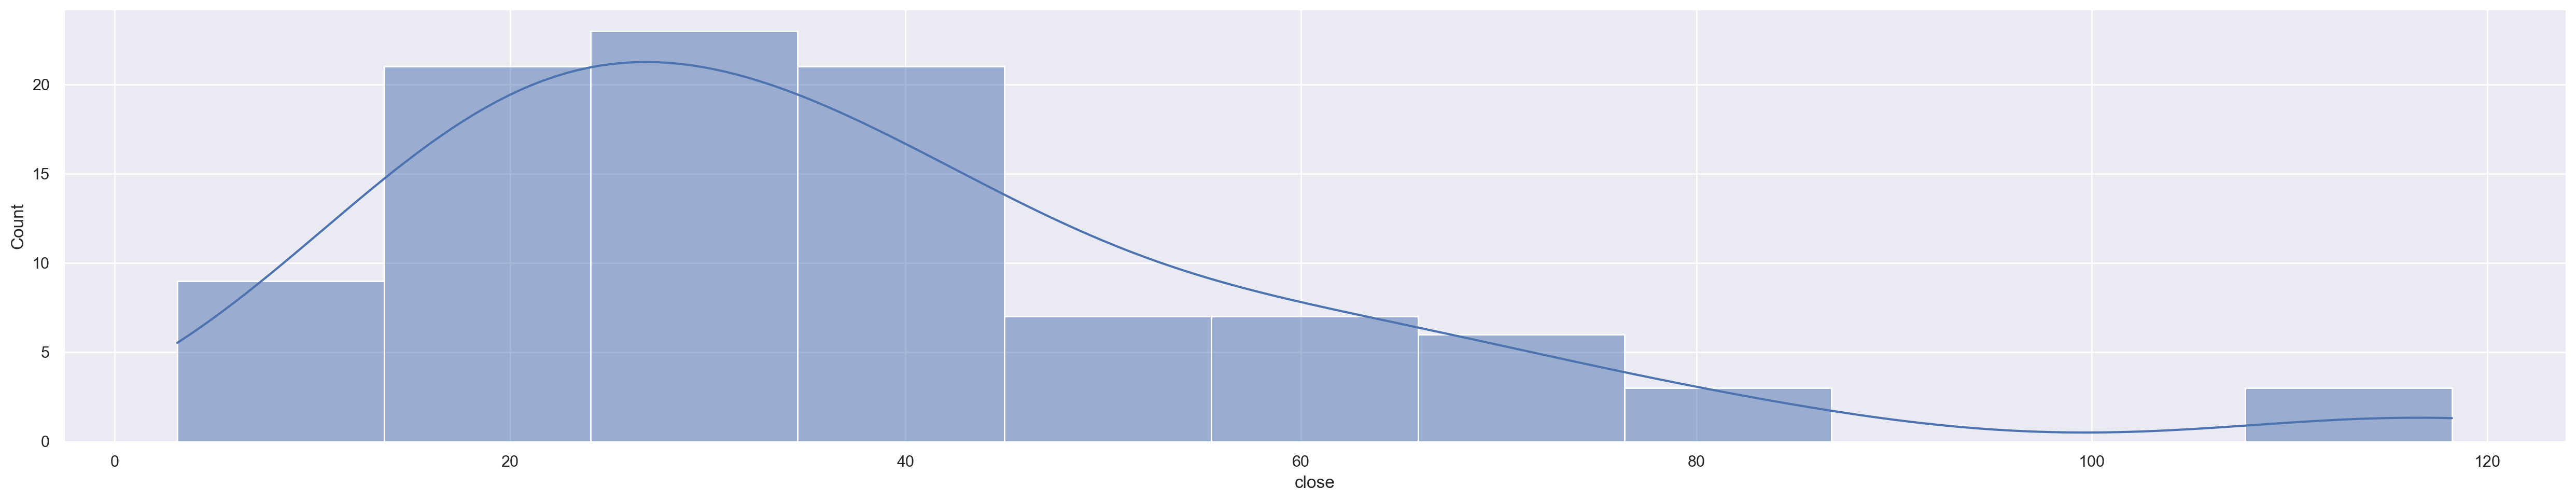

In [72]:
sns.set_theme()
sns.displot(data=dfm, x="close", kde=True,height=5,aspect=5)
plt.show()

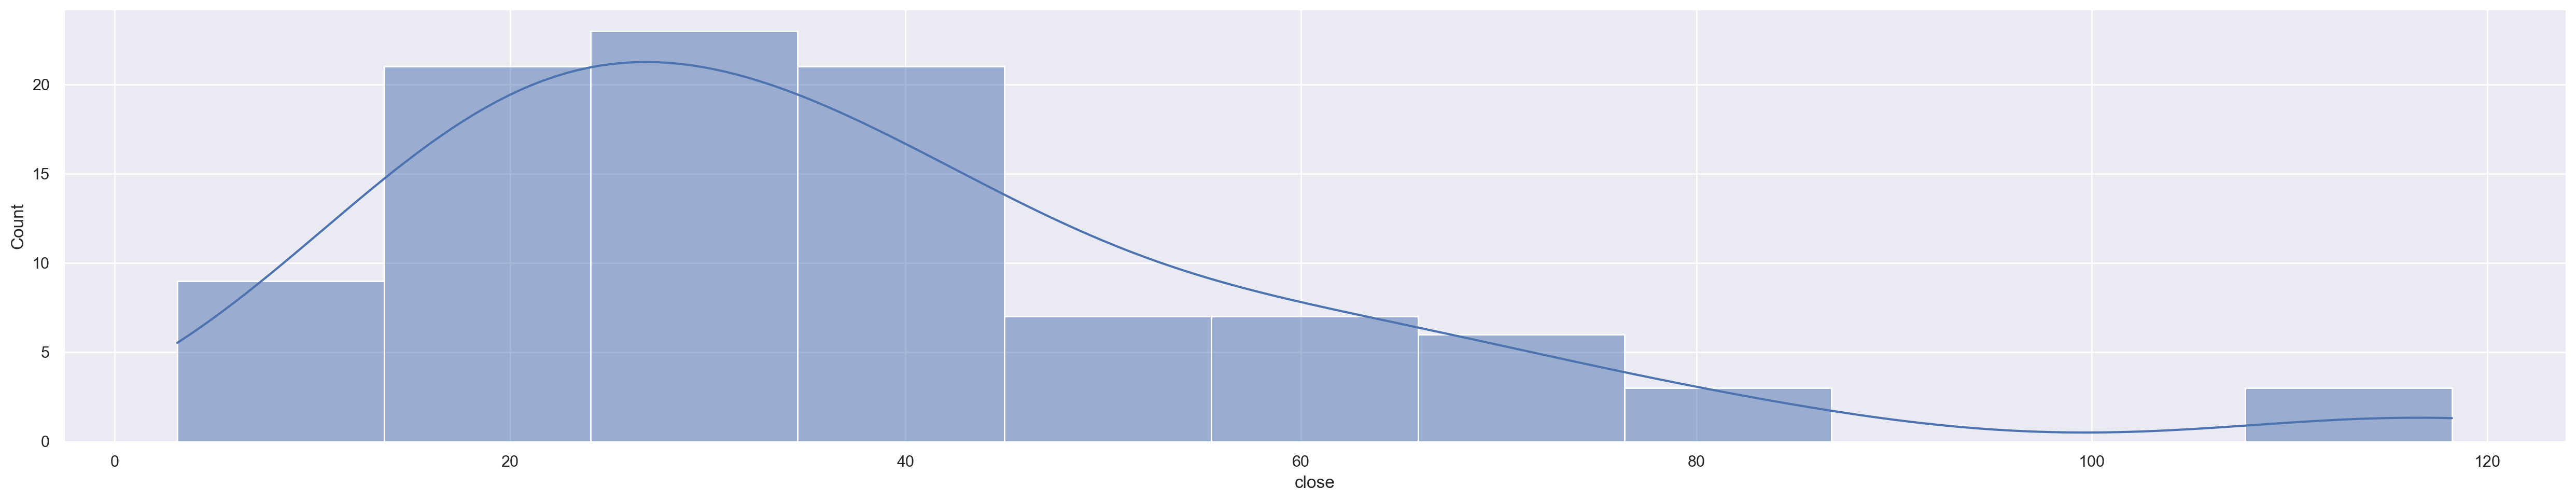

In [80]:
sns.set_theme()
sns.displot(data=dfm, x="close", kde=True,height=5,aspect=5)
plt.show()

## returnsClosePrevRaw1, returnsOpenPrevRaw1, returnsClosePrevRaw10, returnsOpenPrevRaw10, returnsOpenNextMktres10
[return系列](https://www.investopedia.com/terms/r/rateofreturn.asp)：   
- rate of return = $\frac{current \ price - initial \ price}{initial \ price}$  (dividends, coupon will affect RoR)
- Returns are always calculated either open-to-open (from the opening time of one trading day to the open of another) or close-to-close (from the closing time of one trading day to the open of another).
- Returns are either raw, meaning that the data is not adjusted against any [benchmark](https://www.investopedia.com/articles/investing/032516/how-use-benchmark-evaluate-portfolio.asp), or [market-residualized](https://quant.stackexchange.com/questions/25619/excess-residual-and-active-return/25627) ([Mktres](https://www.bionicturtle.com/forum/threads/difference-between-active-and-residual-return-risk.7216/)), meaning that the movement of the market as a whole has been accounted for, leaving only movements inherent to the instrument.
   - Active return: $R-R_m, \ \forall \ R=RoR, \ R_m=Benchmark \ RoR$
   - [Excess return](https://www.investopedia.com/terms/e/excessreturn.asp): $R-R_f,\ \forall \ R_f = riskfree \ rate$，因为$R_f$被视为理想的投资
   - [Residual return](https://www.investopedia.com/terms/b/beta.asp):$R-R_f−\beta(R_m−R_f) = Excess \ return - \beta * (Benchmark's \ excess \ return)$
- Returns can be calculated over any arbitrary interval. Provided here are 1 day and 10 day horizons.
- Returns are tagged with 'Prev' if they are backwards looking in time, or 'Next' if forwards looking.
- 只有一个`NextMktres`

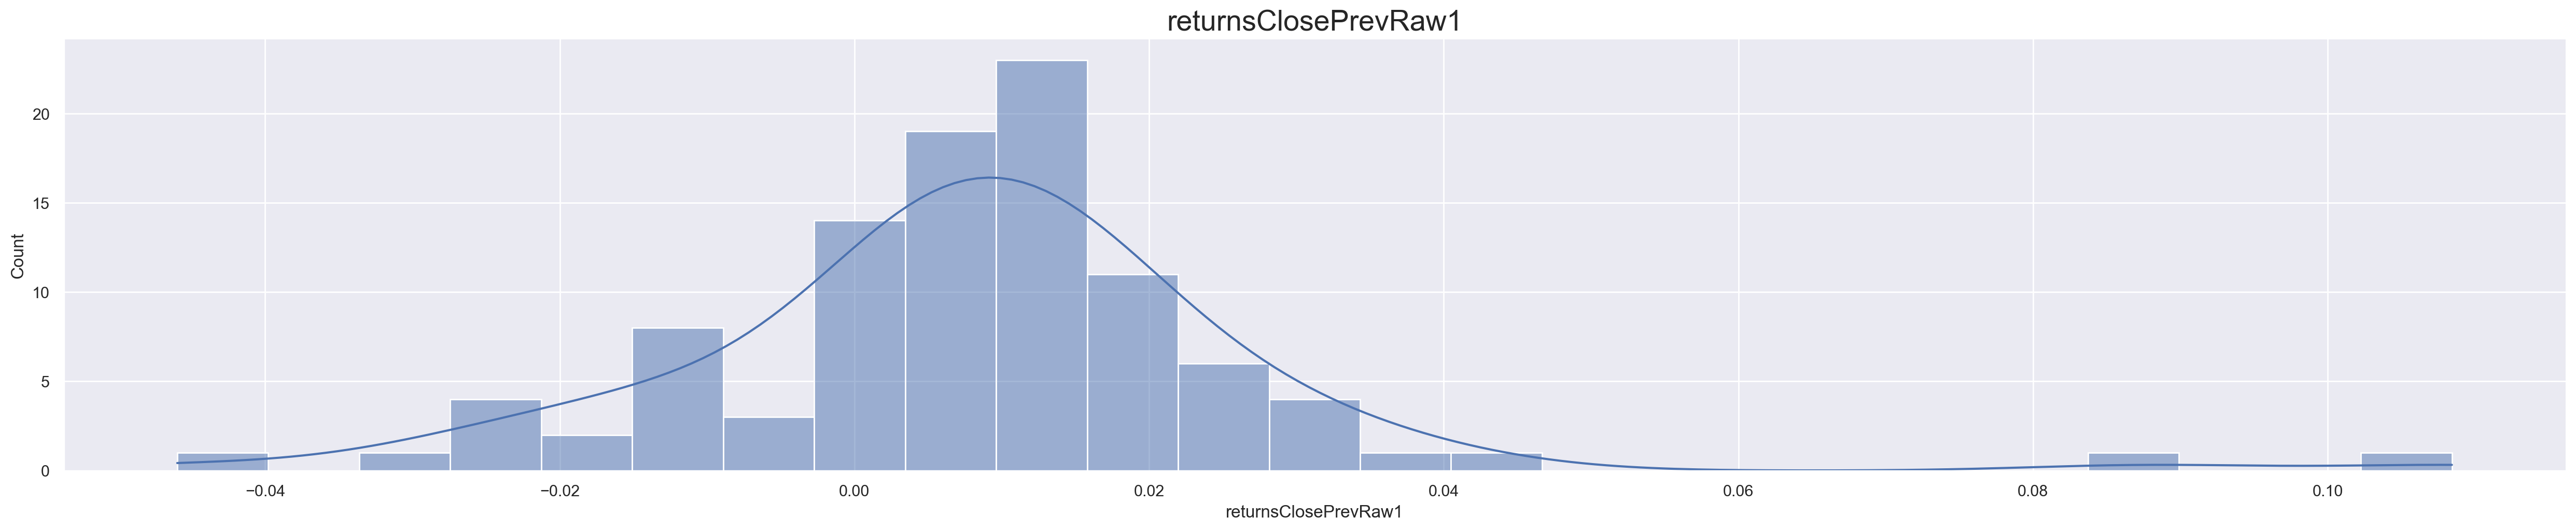

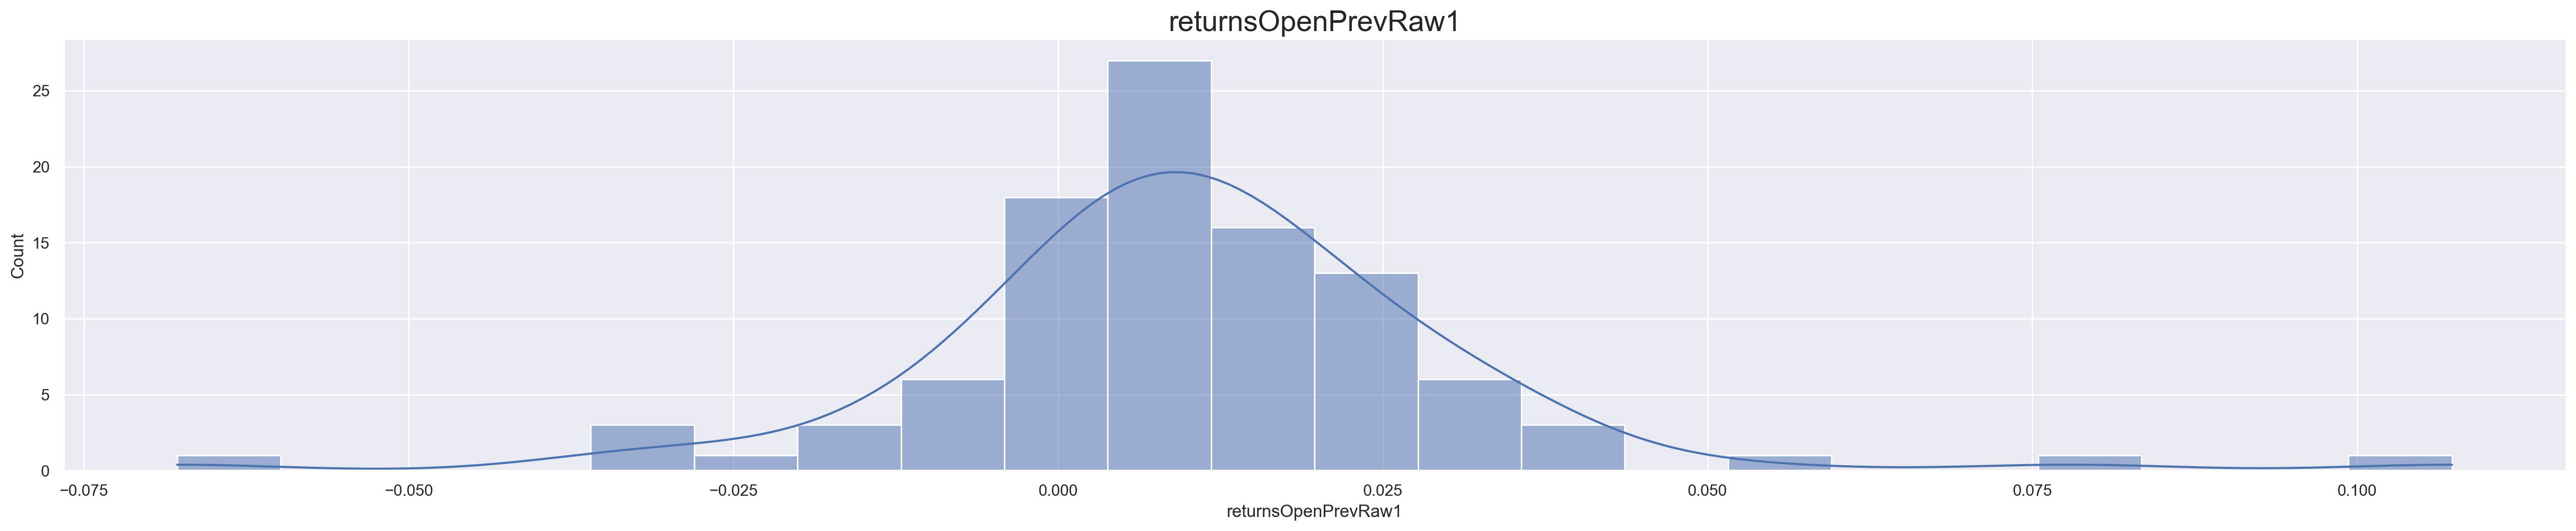

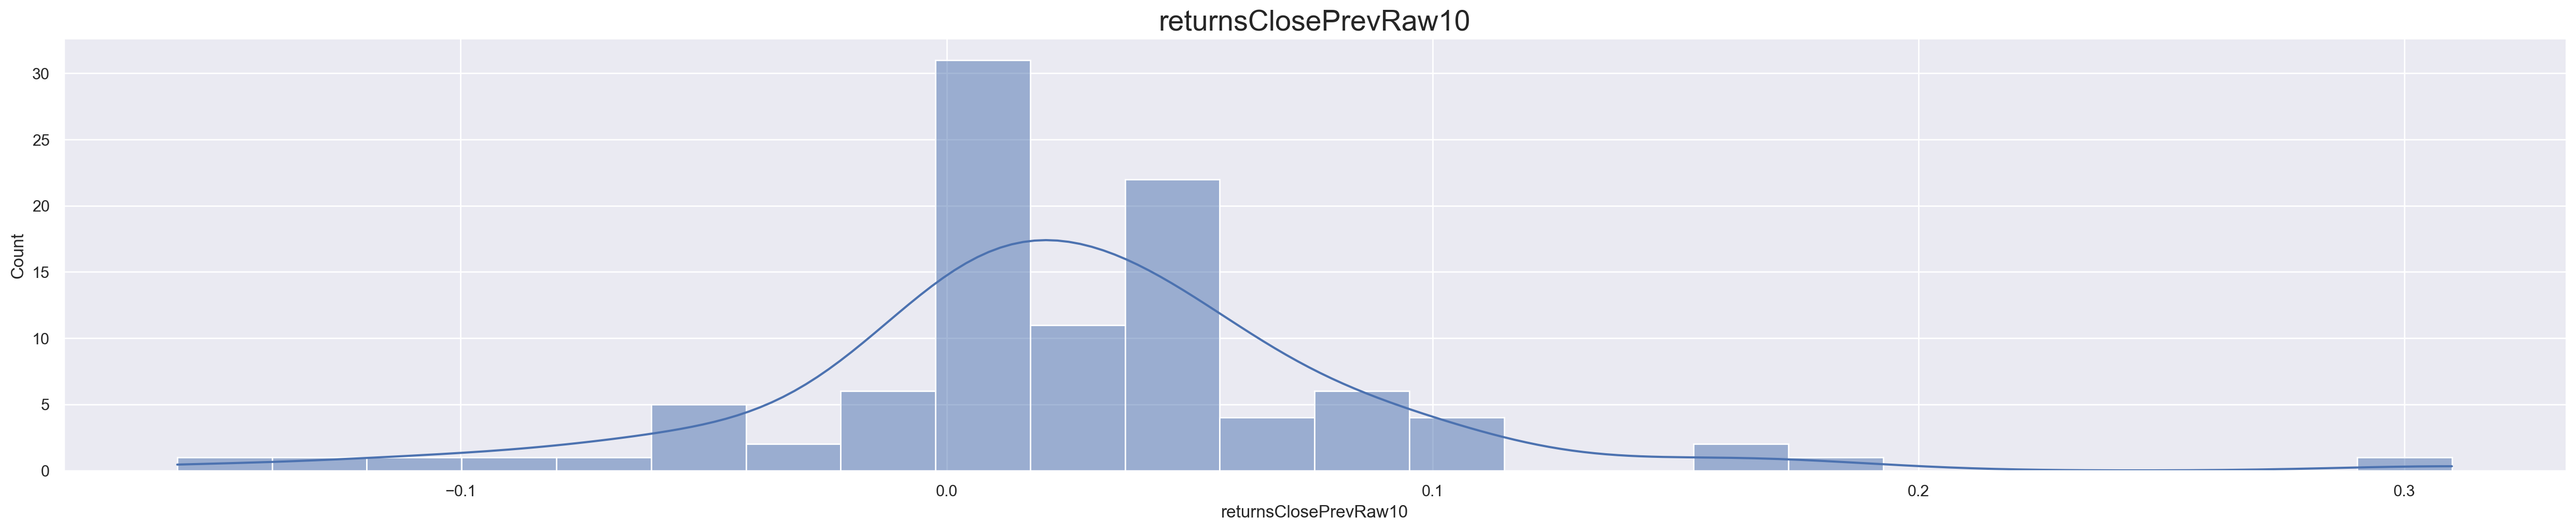

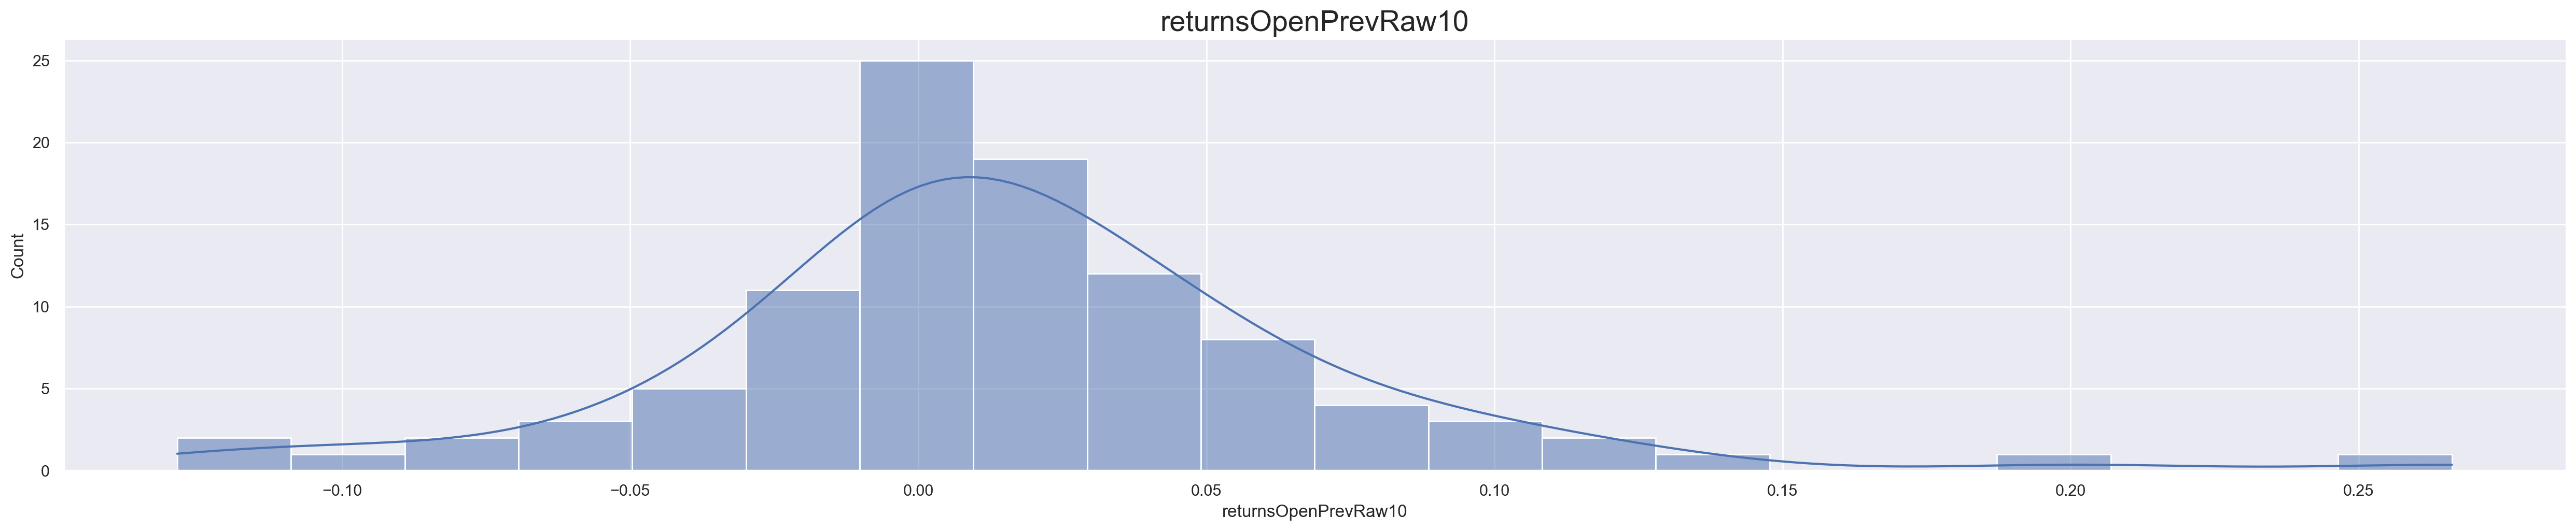

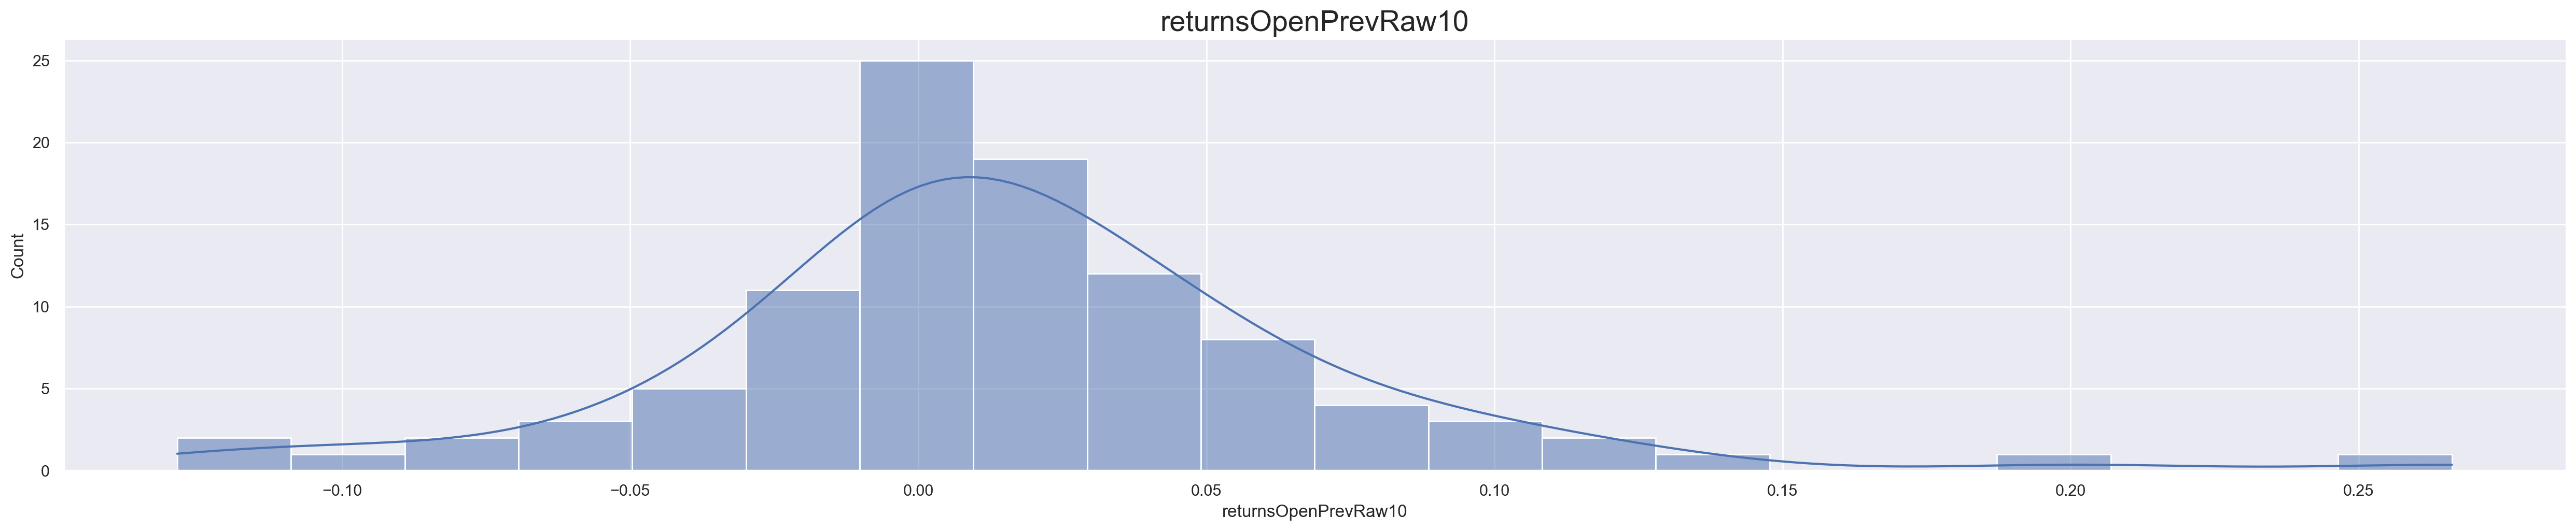

In [83]:
sns.set_theme()
sns.displot(data=dfm, x="returnsClosePrevRaw1", kde=True,height=5,aspect=5)
plt.title("returnsClosePrevRaw1",fontsize=20)
plt.show()

sns.set_theme()
sns.displot(data=dfm, x="returnsOpenPrevRaw1", kde=True,height=5,aspect=5)
plt.title("returnsOpenPrevRaw1",fontsize=20)
plt.show()

sns.set_theme()
sns.displot(data=dfm, x="returnsClosePrevRaw10", kde=True,height=5,aspect=5)
plt.title("returnsClosePrevRaw10",fontsize=20)
plt.show()

sns.set_theme()
sns.displot(data=dfm, x="returnsOpenPrevRaw10", kde=True,height=5,aspect=5)
plt.title("returnsOpenPrevRaw10",fontsize=20)
plt.show()

sns.set_theme()
sns.displot(data=dfm, x="returnsOpenPrevRaw10", kde=True,height=5,aspect=5)
plt.title("returnsOpenPrevRaw10",fontsize=20)
plt.show()

## returnsClosePrevMktres1, returnsOpenPrevMktres1, returnsClosePrevMktres10, returnsOpenPrevMktres10
- null；This means that there may be instruments that enter and leave this subset of data. There may therefore be gaps in the data provided, and this does not necessarily imply that that data does not exist (those rows are likely not included due to the selection criteria)
- 都是`Mktres`

## continuous variables
- high corr:    
   - '>0.9': open & close, returnsOpenPrevRaw10 & returnsClosePrevRaw10
   - '>0.5': returnsOpenPrevRaw1 & returnsClosePrevRaw1

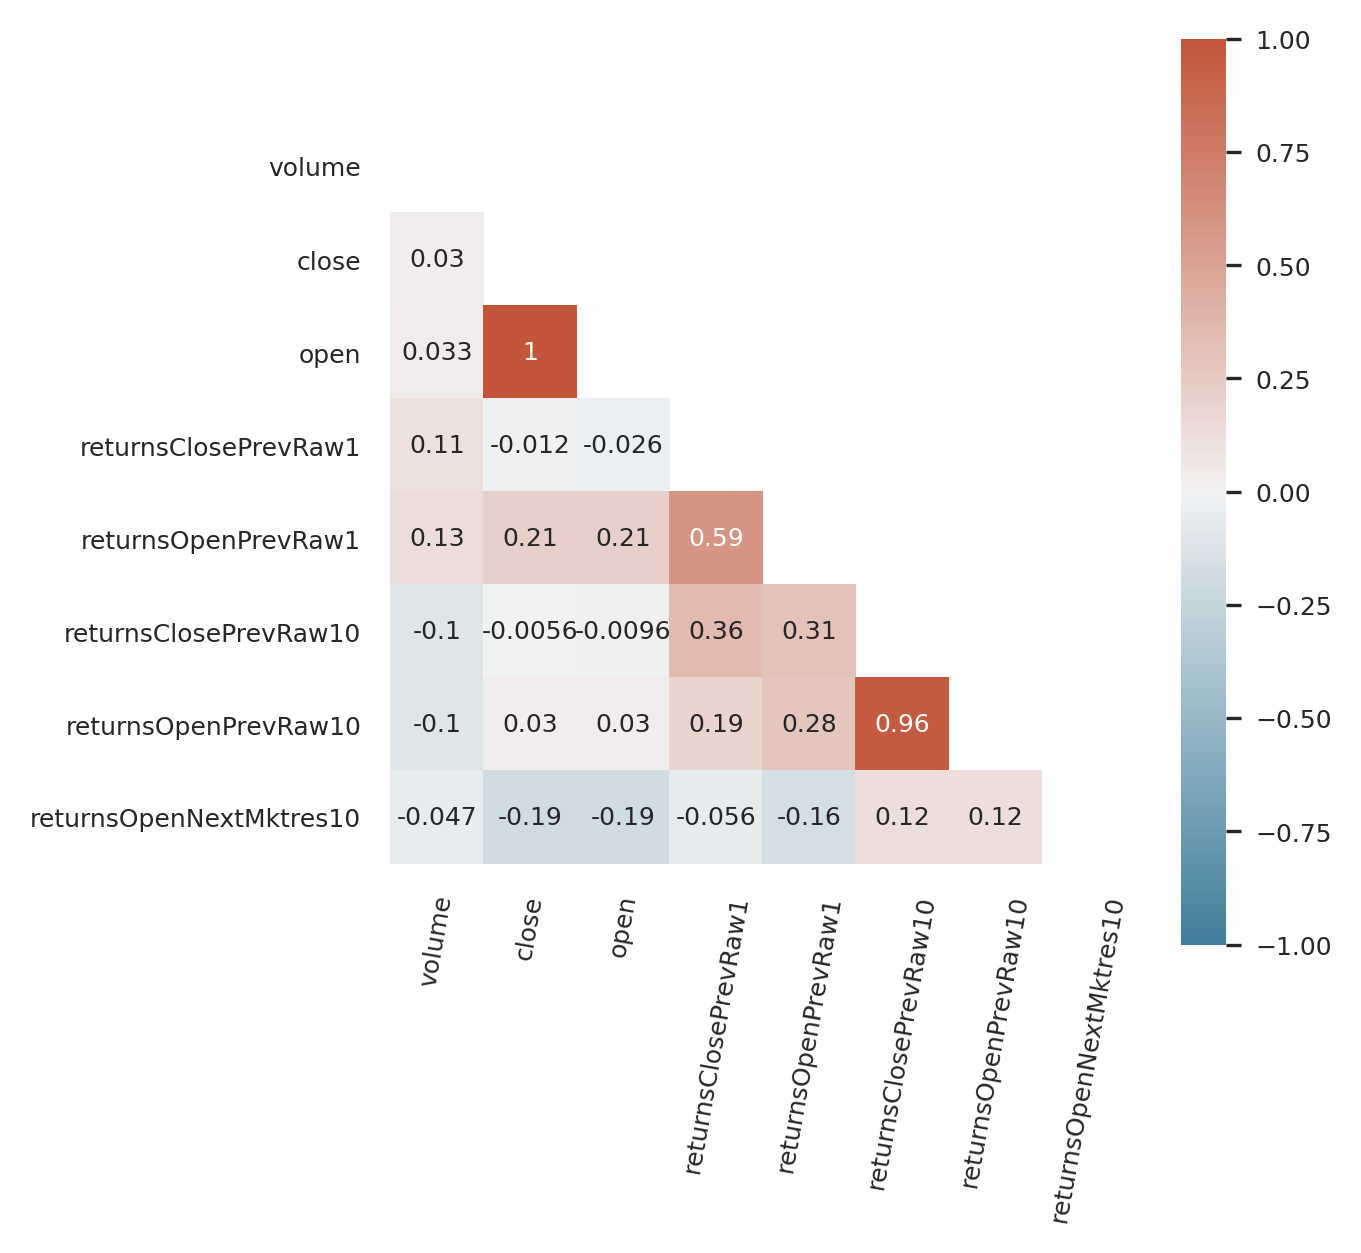

In [6]:
#corr 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = dfm.dropna(axis='columns').select_dtypes(include=['float64']).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(corr,square=True, annot=True, cmap=cmap,vmin=-1,vmax=1, annot_kws={"size": 6},mask=mask)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 6, rotation=80)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 6)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=6)

-----
# [Newsdata](https://www.kaggle.com/c/two-sigma-financial-news/data)

首先列出第一笔数据，大致来看下数据的样子

In [86]:
display(dfn.iloc[1,:])

time                                            2007-01-01 07:03:35+00:00
sourceTimestamp                                 2007-01-01 07:03:34+00:00
firstCreated                                    2007-01-01 07:03:34+00:00
sourceId                                                 5a31c4327427f63f
headline                        FEATURE-In kidnapping, finesse works best
urgency                                                                 3
takeSequence                                                            1
provider                                                             RTRS
subjects                {'BD', 'INS', 'LATAM', 'CA', 'US', 'MX', 'IL',...
audiences               {'PGE', 'PCU', 'PCO', 'DNP', 'MD', 'E', 'G', '...
bodySize                                                             4413
companyCount                                                            1
headlineTag                                                       FEATURE
marketCommentary                      

经历过初步探索和了解后，转换下数据:
- datetime: (3)
- object: (6)
- category: (11)
- float: else (17)

只有`headlineTag`有null

In [173]:
dfn['urgency'] = dfn.urgency.astype('category')
dfn['takeSequence'] = dfn.takeSequence.astype('category')
dfn['provider'] = dfn.provider.astype('category')
dfn['headlineTag'] = dfn.headlineTag.astype('category')
dfn['marketCommentary'] = dfn.marketCommentary.astype('category')
dfn['sentimentClass'] = dfn.sentimentClass.astype('category')
dfn['noveltyCount12H'] = dfn.noveltyCount12H.astype('category')
dfn['noveltyCount24H'] = dfn.noveltyCount24H.astype('category')
dfn['noveltyCount3D'] = dfn.noveltyCount3D.astype('category')
dfn['noveltyCount5D'] = dfn.noveltyCount5D.astype('category')
dfn['noveltyCount7D'] = dfn.noveltyCount7D.astype('category')

In [174]:
dfn.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  100 non-null    datetime64[ns]
 1   sourceTimestamp       100 non-null    datetime64[ns]
 2   firstCreated          100 non-null    datetime64[ns]
 3   sourceId              100 non-null    object        
 4   headline              100 non-null    object        
 5   urgency               100 non-null    category      
 6   takeSequence          100 non-null    category      
 7   provider              100 non-null    category      
 8   subjects              100 non-null    object        
 9   audiences             100 non-null    object        
 10  bodySize              100 non-null    int64         
 11  companyCount          100 non-null    int64         
 12  headlineTag           36 non-null     category      
 13  marketCommentary     

## time, sourceTimestamp, firstCreated
如果到秒数的话三个变数在同一笔数据都一样

In [100]:
#time
dfn['time'] = pd.to_datetime(dfn.time, format='%Y-%m-%d %H:%M')
dfn['time'] = dfn["time"].dt.strftime('%Y-%m-%d %H:%M:%S')
dfn['time'] = pd.to_datetime(dfn.time, format='%Y-%m-%d %H:%M:%S')
#sourceTimestamp
dfn['sourceTimestamp'] = pd.to_datetime(dfn.time, format='%Y-%m-%d %H:%M')
dfn['sourceTimestamp'] = dfn["sourceTimestamp"].dt.strftime('%Y-%m-%d %H:%M:%S')
dfn['sourceTimestamp'] = pd.to_datetime(dfn.time, format='%Y-%m-%d %H:%M:%S')
#firstCreated
dfn['firstCreated'] = pd.to_datetime(dfn.time, format='%Y-%m-%d %H:%M')
dfn['firstCreated'] = dfn["firstCreated"].dt.strftime('%Y-%m-%d %H:%M:%S')
dfn['firstCreated'] = pd.to_datetime(dfn.time, format='%Y-%m-%d %H:%M:%S')

len(dfn[(dfn.time==dfn.sourceTimestamp)&(dfn.time==dfn.firstCreated)&(dfn.sourceTimestamp==dfn.firstCreated)])

100

## sourceId
虽是Id但会有重复的Id，因为会有同一个新闻内涵盖不同`assetCodes`和`assetName`的状况

In [89]:
dfn.sourceId.value_counts().sort_values(ascending=False)

23768af19dc69992    6
4ba95d0bb0f21a2f    5
6a19af0534fa9d1d    4
6f2c45b9a80ddce4    3
5e480c85339688aa    3
                   ..
bba75171c13cbf8f    1
060ef23c7aba0051    1
f996c05a5d037a4a    1
a5245326d6a68716    1
35f615a5e8c89780    1
Name: sourceId, Length: 67, dtype: int64

In [91]:
display(dfn[dfn.sourceId=='23768af19dc69992'].iloc[:,16:])

,assetCodes,assetName,firstMentionSentence,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
3,"{'GOOG.O', 'GOOG.OQ', 'GOOGa.DE'}",Google Inc,13,0.149071,-1,0.752917,0.162715,0.084368,83,0,0,0,0,0,0,0,5,13,15
4,{'XMSR.O'},XM Satellite Radio Holdings Inc,11,0.149071,-1,0.699274,0.209360,0.091367,102,0,0,0,0,0,0,0,0,0,0
5,"{'SIRI.OQ', 'SIRI.O'}",Sirius XM Radio Inc,0,0.149071,-1,0.476228,0.336996,0.186776,325,0,0,0,0,0,0,0,0,2,3
6,"{'DIS.N', 'DIS.DE', 'DIS.F'}",Walt Disney Co,5,0.149071,0,0.152658,0.615878,0.231464,46,0,0,0,0,0,0,0,2,8,8
7,"{'MSFT.DE', 'MSFT.F', 'MSFT.OQ', 'MSFT.O'}",Microsoft Corp,10,0.447214,0,0.325929,0.374173,0.299898,130,0,0,0,0,0,0,0,0,4,16
8,"{'YHOO.O', 'YHOO.OQ', 'YHOO.DE'}",Yahoo! Inc,13,0.149071,0,0.091373,0.633713,0.274914,83,0,0,0,0,0,0,2,8,11,12


## headline
如果`sourceId`一样则`headline`一样，但反之则否

In [95]:
display(dfn['headline'].head(5))

0    China's Daqing pumps 43.41 mln tonnes of oil i...
1            FEATURE-In kidnapping, finesse works best
2           PRESS DIGEST - Wall Street Journal - Jan 1
3                PRESS DIGEST - New York Times - Jan 1
4                PRESS DIGEST - New York Times - Jan 1
Name: headline, dtype: object

In [96]:
display(dfn[dfn.headline=='Korea Hot Stocks-LG Elec, LG.Philips, Banks, KEPCO'].sourceId)

53    5e480c85339688aa
54    5e480c85339688aa
55    5e480c85339688aa
58    6a19af0534fa9d1d
59    6a19af0534fa9d1d
60    6a19af0534fa9d1d
61    6a19af0534fa9d1d
Name: sourceId, dtype: object

## urgency
story type   
1: alert, 3: article；categorical variable

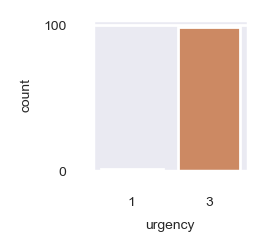

In [115]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(1,1))
sns.countplot(x="urgency", data=dfn)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)
plt.xlabel('urgency', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.show()

## takeSequence
序列？ 不太懂意思    
categorical variable

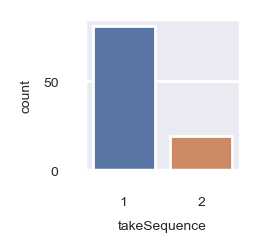

In [116]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(1,1))
sns.countplot(x="takeSequence", data=dfn)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)
plt.xlabel('takeSequence', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.show()

## provider
供应新闻的来源
categorical variable

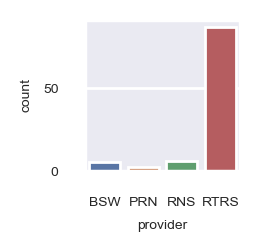

In [118]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(1,1))
sns.countplot(x="provider", data=dfn)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)
plt.xlabel('provider', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.show()

## subjects
就是一些对应的hashtag，尚未将这些分类清理好   
topic codes and company identifiers that relate to this news item. Topic codes describe the news item's subject matter. These can cover asset classes, geographies, events, industries/sectors, and other types.

In [105]:
dfn.subjects.head(5)

0    {'CRU', 'CN', 'RTRS', 'ENR', 'LEN', 'EMRG', 'N...
1    {'BD', 'INS', 'LATAM', 'CA', 'US', 'MX', 'IL',...
2    {'IQ', 'RO', 'US', 'ID', 'RET', 'RTRS', 'ENR',...
3    {'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...
4    {'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...
Name: subjects, dtype: object

## audiences
就是一些对应的hashtag，尚未将这些分类清理好   
特定受眾的hashtag   
identifies which desktop news product(s) the news item belongs to. They are typically tailored to specific audiences. (e.g. "M" for Money International News Service and "FB" for French General News Service)

In [107]:
dfn.audiences.head(5)

0                                    {'O', 'Z', 'OIL'}
1    {'PGE', 'PCU', 'PCO', 'DNP', 'MD', 'E', 'G', '...
2    {'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...
3    {'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...
4    {'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...
Name: audiences, dtype: object

## bodySize
the size of the current version of the story body in characters

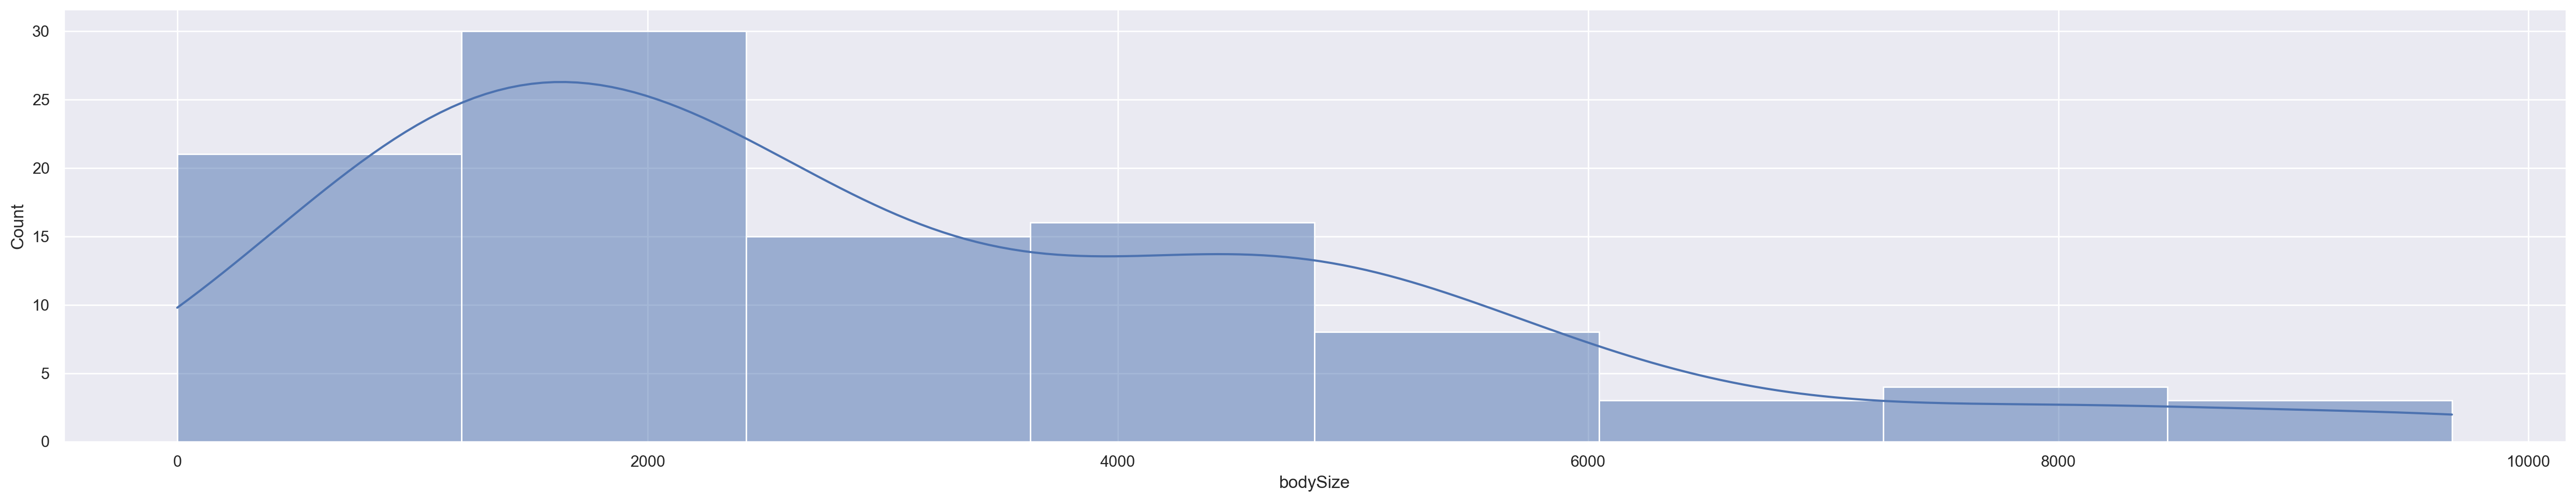

In [108]:
sns.set_theme()
sns.displot(data=dfn, x="bodySize", kde=True,height=5,aspect=5)
plt.show()

## companyCount
在新闻中明确列出的公司数量

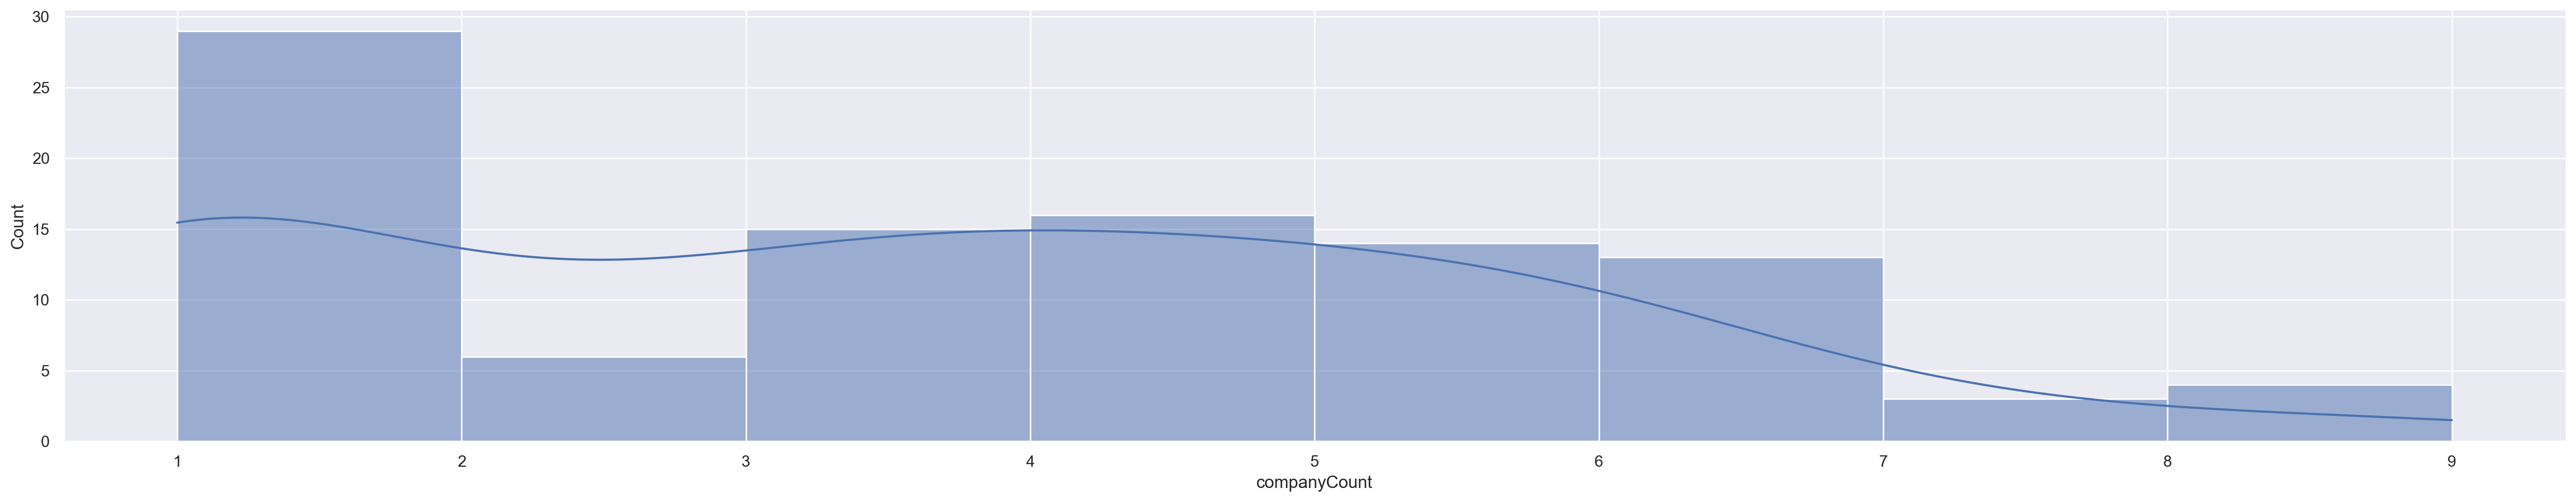

In [109]:
sns.set_theme()
sns.displot(data=dfn, x="companyCount", kde=True,height=5,aspect=5)
plt.show()

## headlineTag
the Thomson Reuters headline tag for the news item；categorical variable

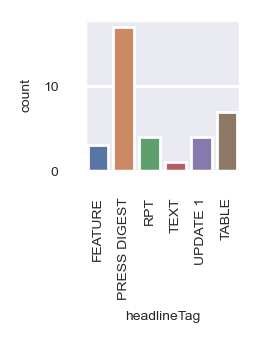

In [117]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(1,1))
sns.countplot(x="headlineTag", data=dfn)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)
plt.xlabel('headlineTag', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.xticks(rotation=90)
plt.show()

## marketCommentary
indicator that the item is discussing general market conditions；categorical variable

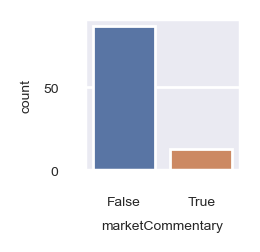

In [121]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(1,1))
sns.countplot(x="marketCommentary", data=dfn)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)
plt.xlabel('marketCommentary', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.show()

## sentenceCount & wordCount

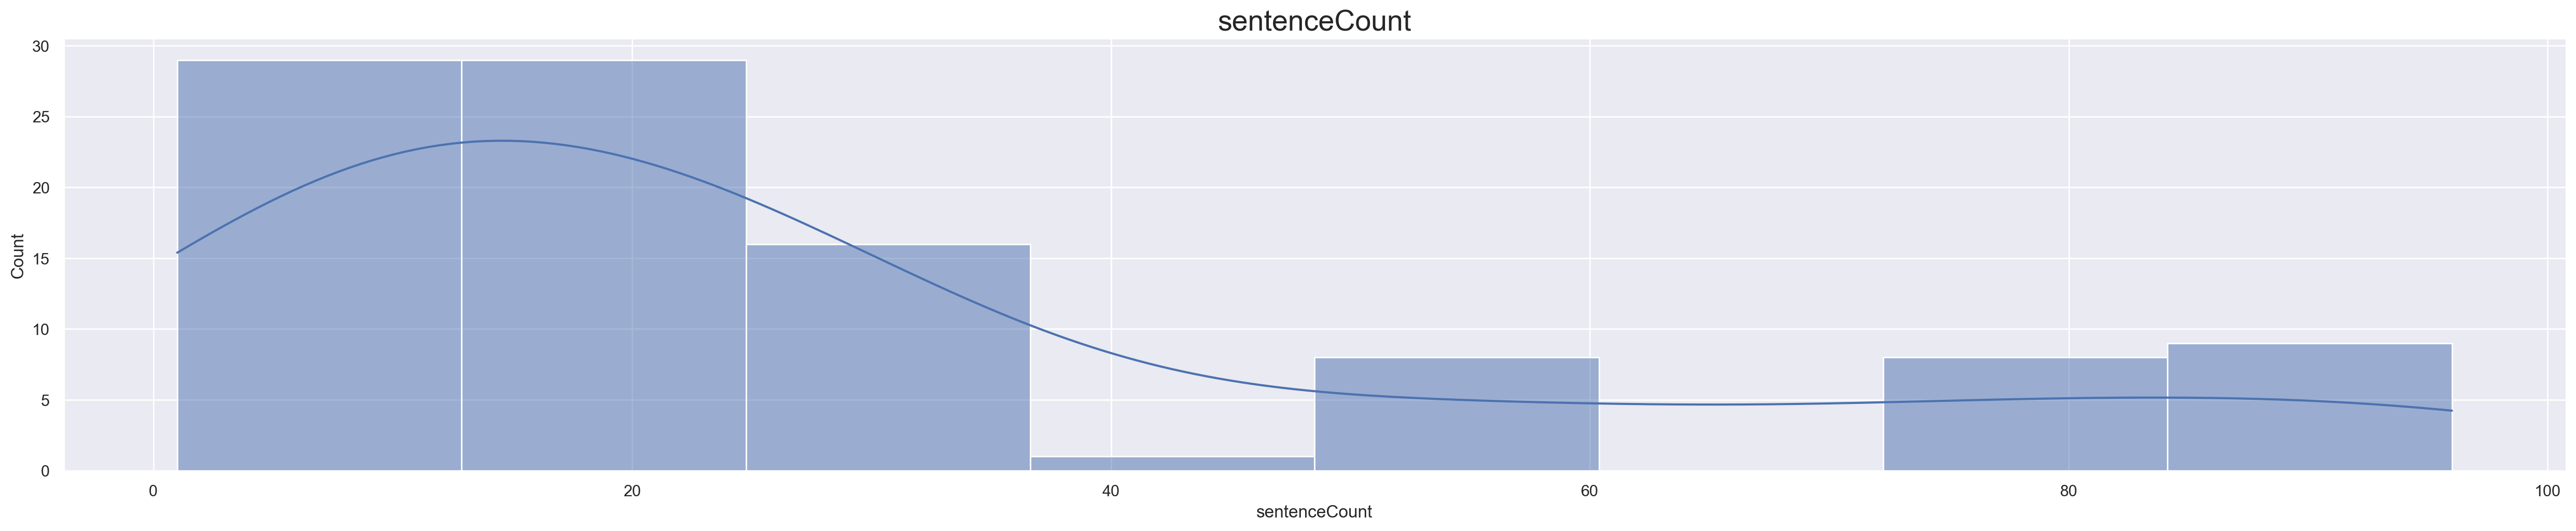

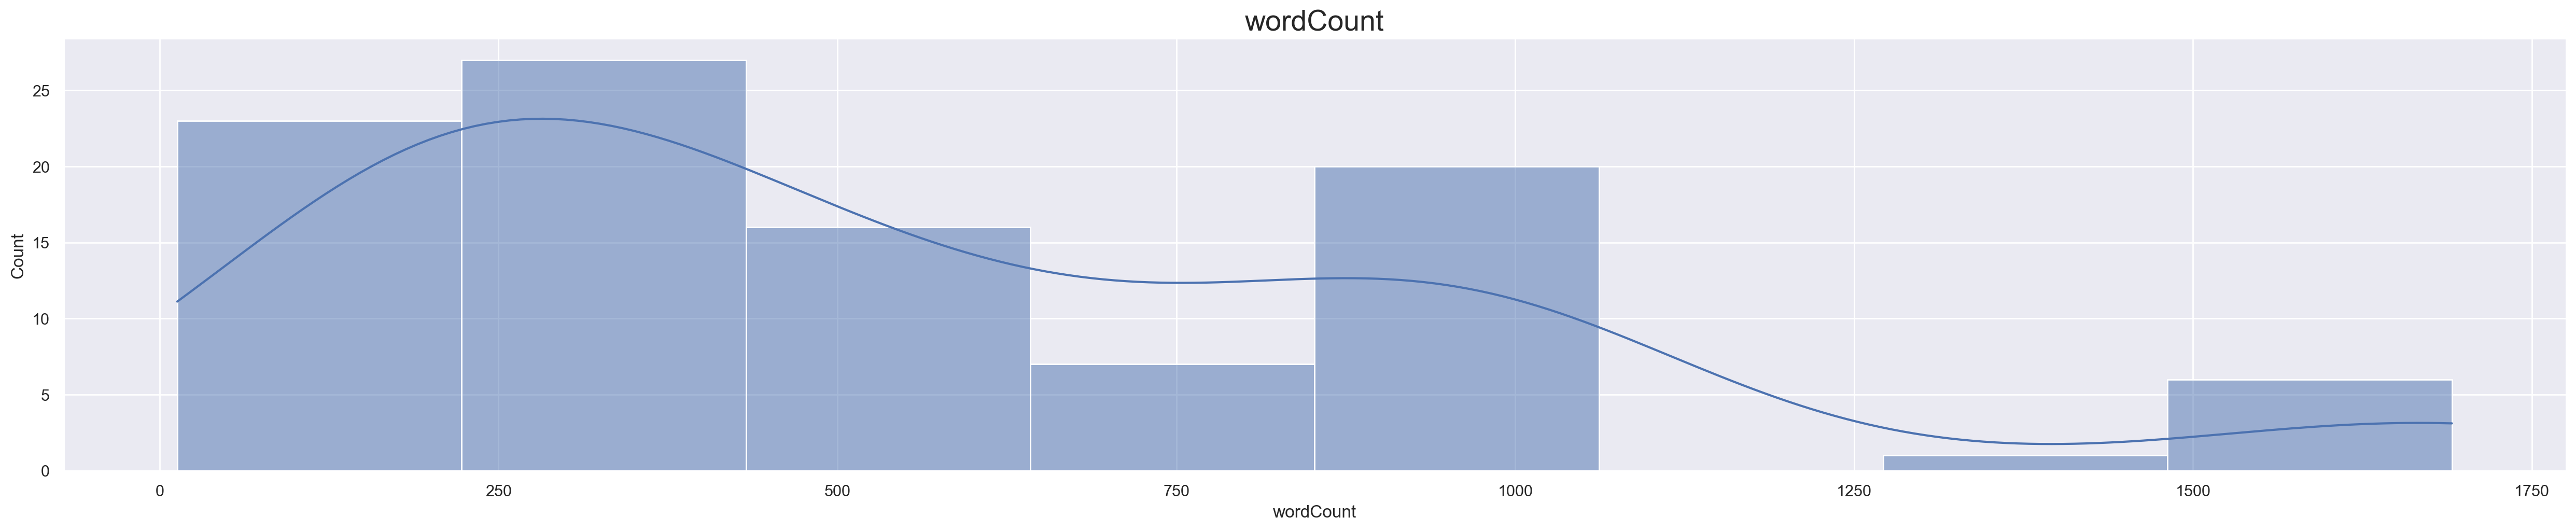

In [122]:
sns.set_theme()
sns.displot(data=dfn, x="sentenceCount", kde=True,height=5,aspect=5)
plt.title("sentenceCount",fontsize=20)
plt.show()

sns.set_theme()
sns.displot(data=dfn, x="wordCount", kde=True,height=5,aspect=5)
plt.title("wordCount",fontsize=20)
plt.show()

## assetCodes
只要该新闻内有提到的就会标进去，尚未将这些分类清理好

In [124]:
dfn.assetCodes.head(5)

0    {'PTR.N', '0857.F', '0857.DE', '0857.HK'}
1                                    {'STA.N'}
2                          {'WMT.N', 'WMT.DE'}
3            {'GOOG.O', 'GOOG.OQ', 'GOOGa.DE'}
4                                   {'XMSR.O'}
Name: assetCodes, dtype: object

## assetName

In [125]:
a = dfn[['assetName','assetCodes']]
b = dfm[['assetName','assetCode']]
b.merge(a, on='assetName',how='left')

,assetName,assetCode,assetCodes
0,Agilent Technologies Inc,A.N,NaN
1,AirTran Holdings Inc,AAI.N,NaN
2,Advance Auto Parts Inc,AAP.N,NaN
3,Apple Inc,AAPL.O,"{'AAPL.DE', 'AAPL.OQ', 'AAPL.F', 'AAPL.O'}"
4,ABB Ltd,ABB.N,NaN
...,...,...,...
95,Amphenol Corp,APH.N,NaN
96,Acme Packet Inc,APKT.O,NaN
97,Apollo Education Group Inc,APOL.O,NaN
98,Applebee's International Inc,APPB.O,NaN


## firstMentionSentence
从标题开始数，第一句包含scored asset的句子是第几句
- 1: headline
- 2: first sentence of the story body
- 3: second sentence of the body, etc
- 0: the asset being scored was not found in the news item's headline or body text. As a result, the entire news item's text (headline + body) will be used to determine the sentiment score.

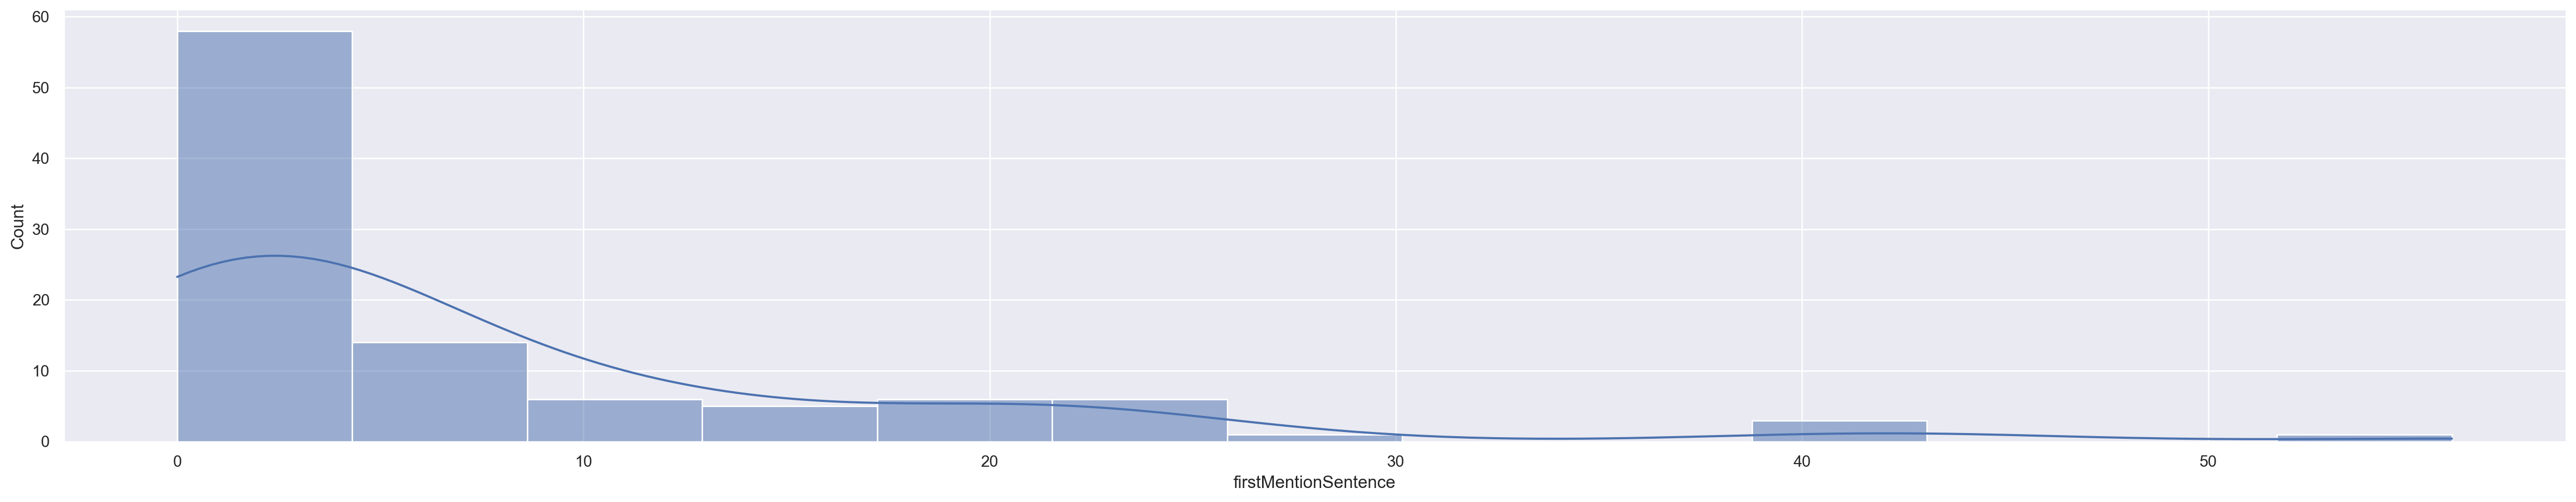

In [126]:
sns.set_theme()
sns.displot(data=dfn, x="firstMentionSentence", kde=True,height=5,aspect=5)
plt.show()

## relevance
indicating the relevance of the news item to the asset.    
It ranges from 0 to 1. If the asset is mentioned in the headline, the relevance is set to 1. When the item is an alert (urgency == 1), relevance should be gauged by firstMentionSentence instead.

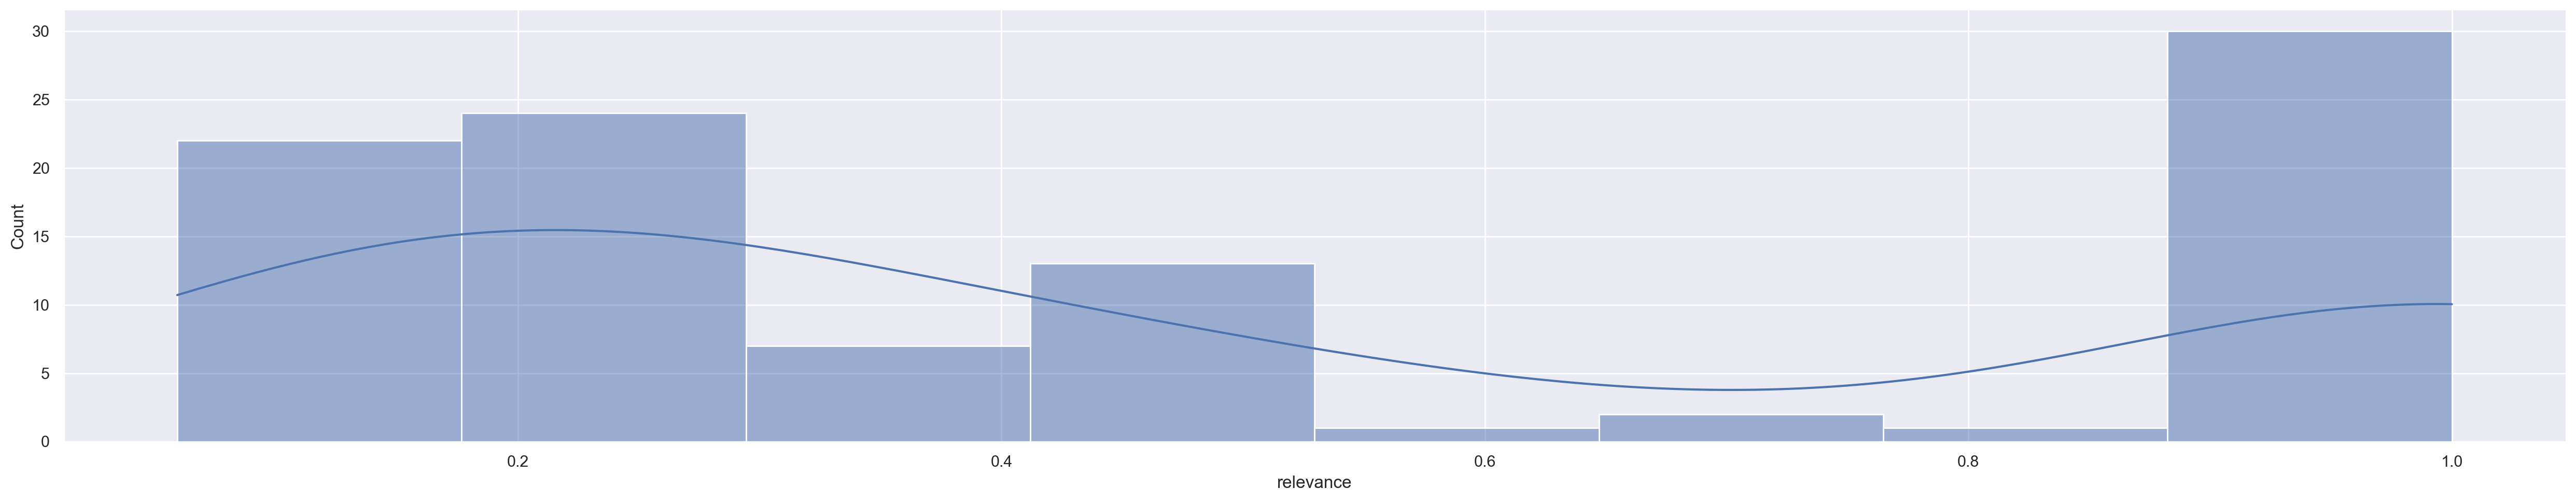

In [127]:
sns.set_theme()
sns.displot(data=dfn, x="relevance", kde=True,height=5,aspect=5)
plt.show()

## sentimentClass
该新闻的情绪类别   
- -1: Negative
- 0: Neutral
- 1: Positive

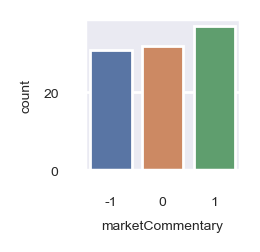

In [129]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(1,1))
sns.countplot(x="sentimentClass", data=dfn)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)
plt.xlabel('marketCommentary', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.show()

## sentimentNegative, sentimentNeutral, sentimentPositive：
该新闻的情绪概率，依照概率最大来分类`sentimentClass`

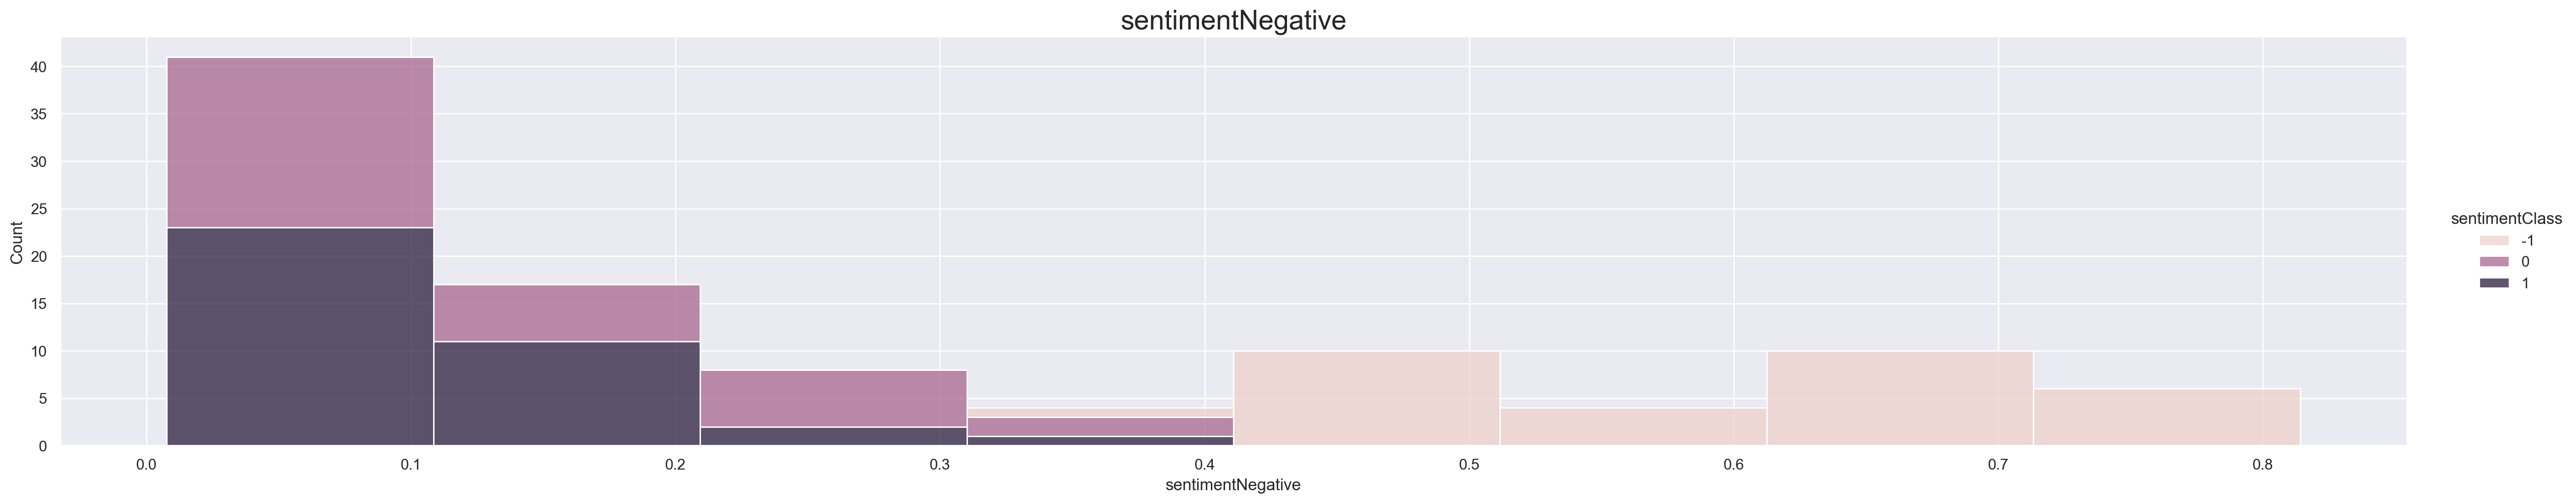

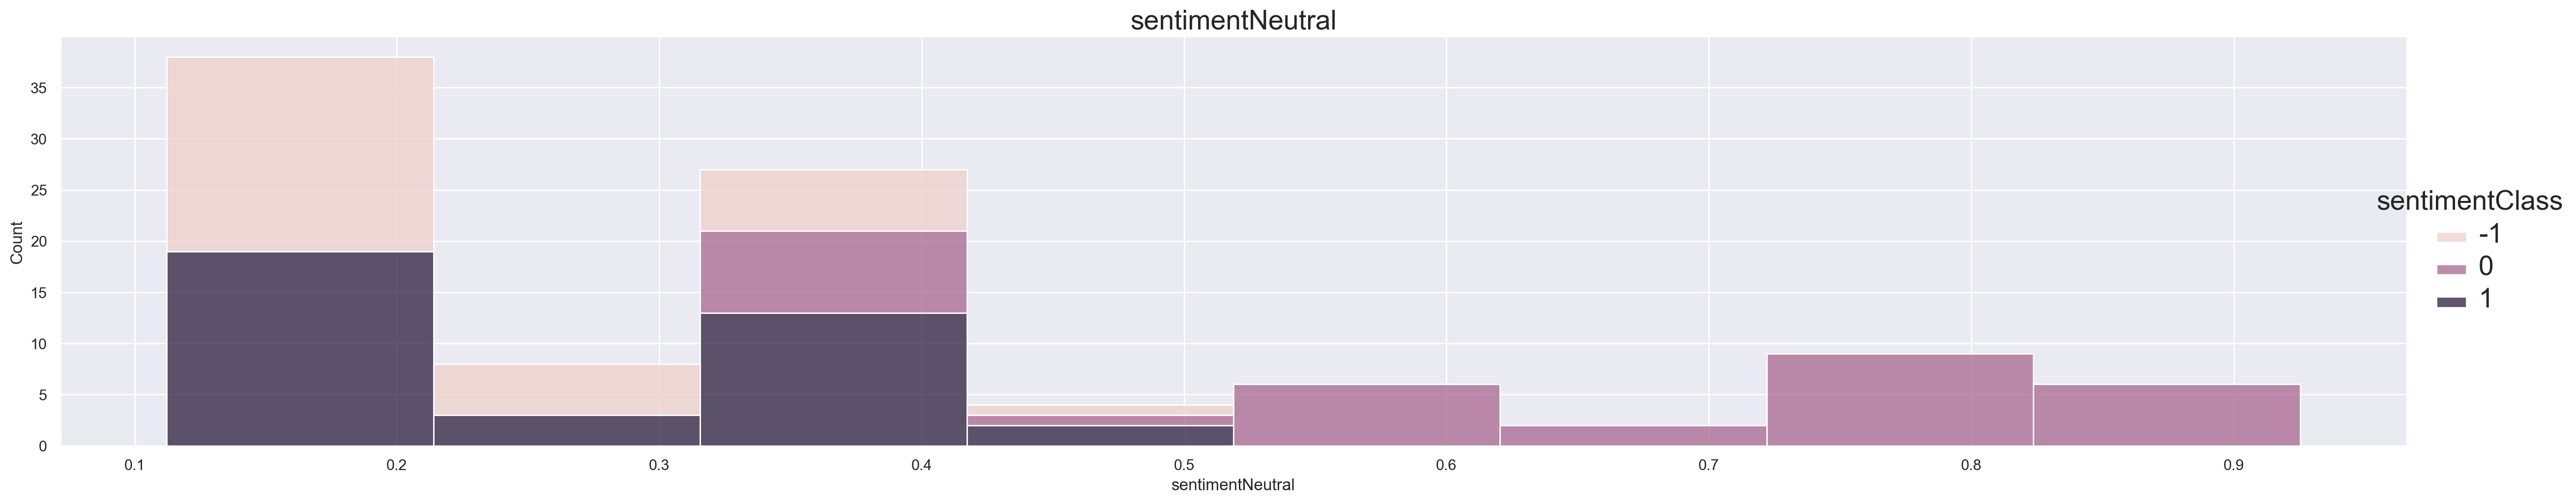

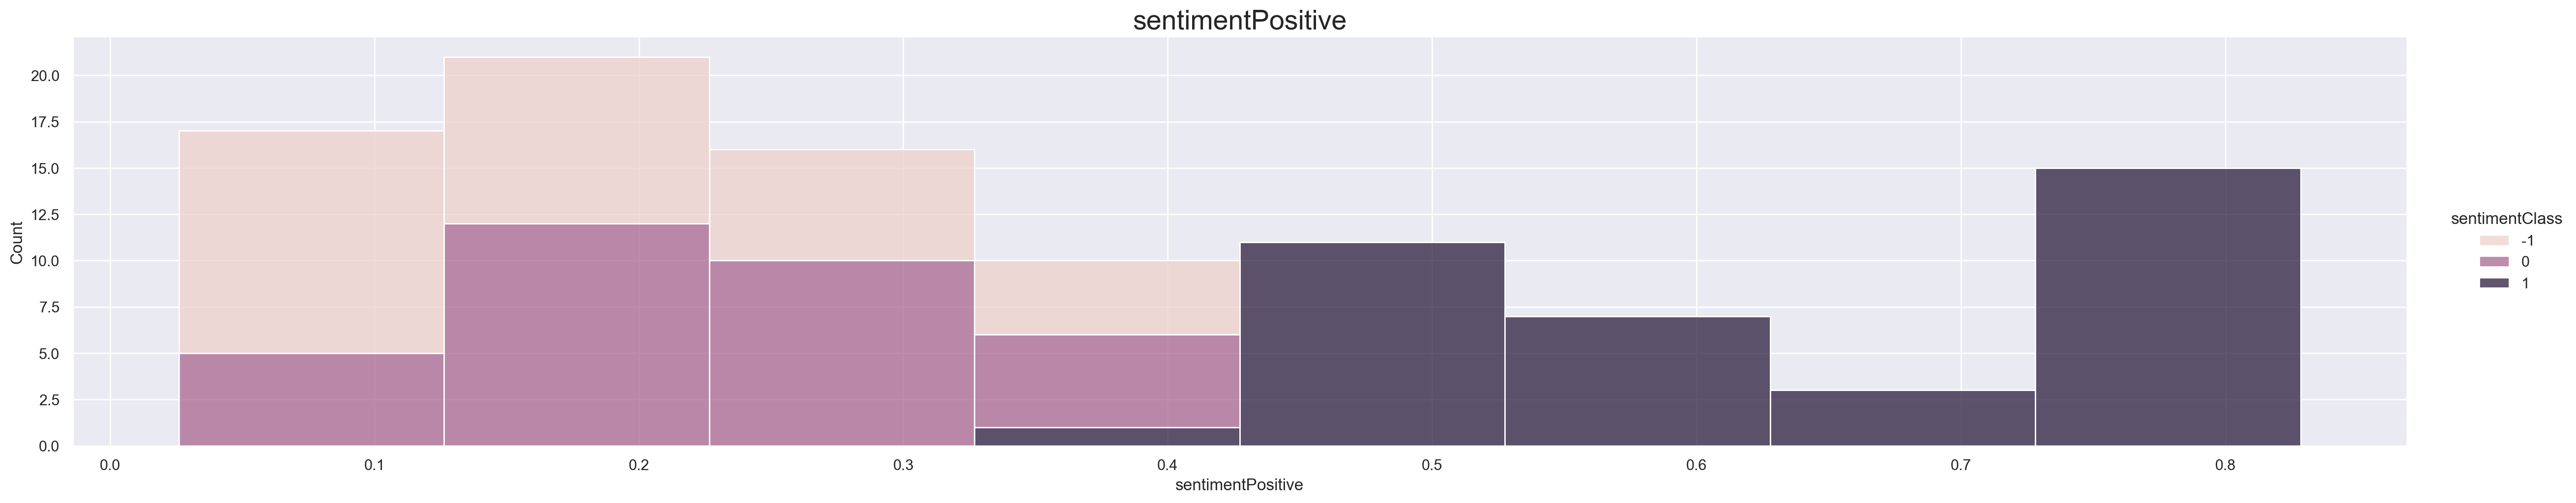

In [140]:
#sentimentNegative  
sns.set_theme()
sns.displot(data=dfn, x="sentimentNegative",height=5,aspect=5,hue='sentimentClass', multiple="stack")
plt.title("sentimentNegative",fontsize=20)
plt.setp(g._legend.get_title(), fontsize=20)
plt.setp(g._legend.get_texts(), fontsize=20)
plt.show()

#sentimentNeutral 
sns.set_theme()
g=sns.displot(data=dfn, x="sentimentNeutral",height=5,aspect=5,hue='sentimentClass', multiple="stack")
plt.title("sentimentNeutral",fontsize=20)
plt.setp(g._legend.get_title(), fontsize=20)
plt.setp(g._legend.get_texts(), fontsize=20)
plt.show()
 
#sentimentPositive   
sns.set_theme()
sns.displot(data=dfn, x="sentimentPositive",height=5,aspect=5,hue='sentimentClass', multiple="stack")
plt.title("sentimentPositive",fontsize=20)
plt.setp(g._legend.get_title(), fontsize=20)
plt.setp(g._legend.get_texts(), fontsize=20)
plt.show()

## sentimentWordCount & 自己计算的ratio
the number of lexical tokens in the sections of the item text that are deemed relevant to the asset. This can be used in conjunction with `wordCount` to determine the proportion of the news item discussing the asset.

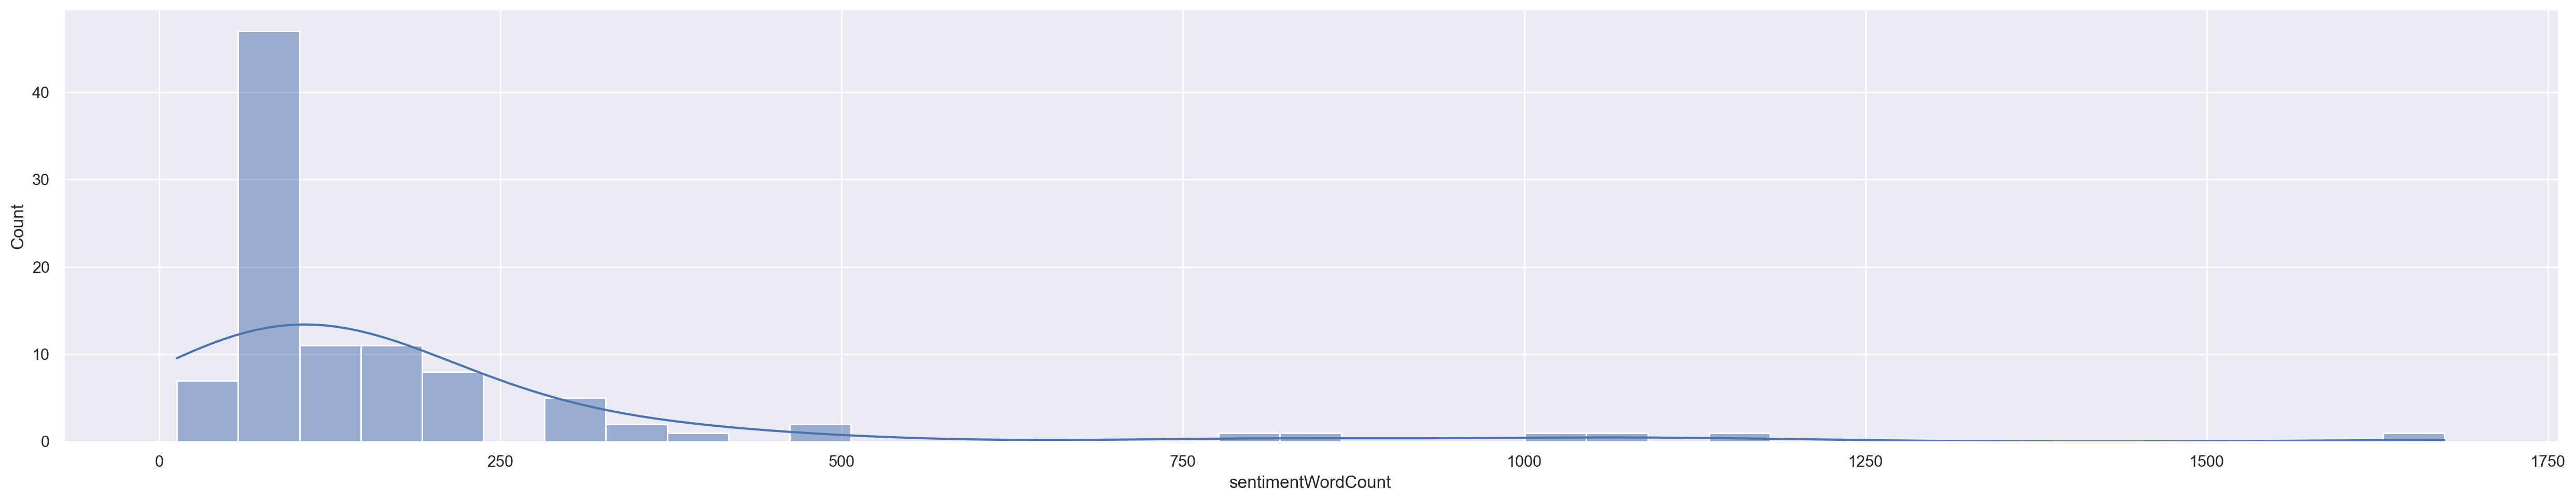

In [141]:
sns.set_theme()
sns.displot(data=dfn, x="sentimentWordCount", kde=True,height=5,aspect=5)
plt.show()

In [156]:
dfn['wordRatio']= dfn.sentimentWordCount/dfn.wordCount

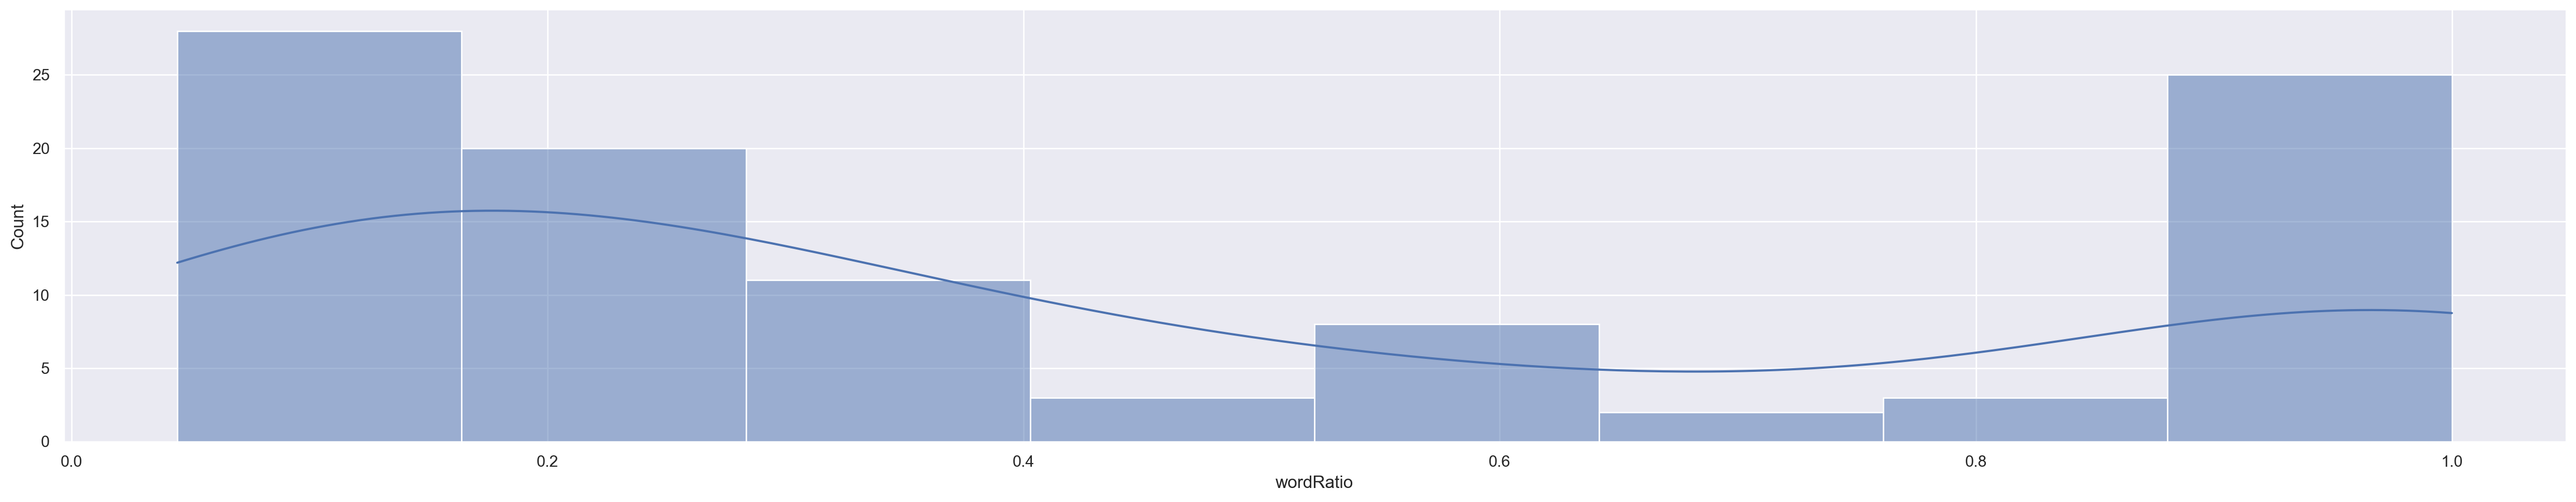

In [157]:
sns.set_theme()
sns.displot(data=dfn, x="wordRatio", kde=True,height=5,aspect=5)
plt.show()

## noveltyCount12H, noveltyCount24H, noveltyCount3D, noveltyCount5D, noveltyCount7D
新穎性   
The novelty of the content within a news item on a particular asset. It is calculated by comparing it with the asset-specific text over a cache of previous news items that contain the asset.   
categorical variables

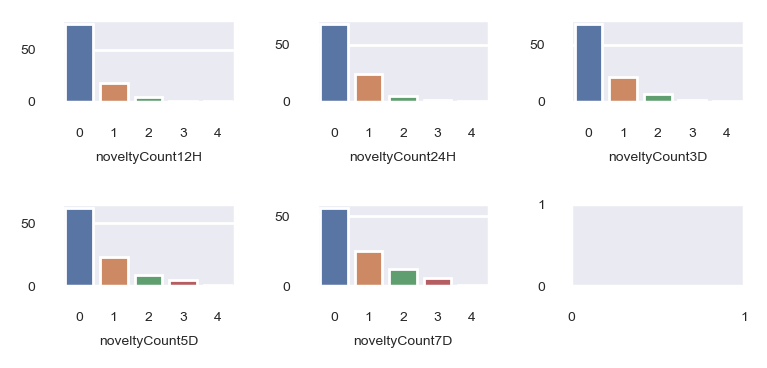

In [170]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(2,3,figsize=(4,2))
sns.countplot(x="noveltyCount12H", data=dfn,ax=ax[0,0])
for label in (ax[0,0].get_xticklabels() + ax[0,0].get_yticklabels()):
    label.set_fontsize(5)
ax[0,0].set_xlabel('noveltyCount12H', fontsize=5)
ax[0,0].set_ylabel('', fontsize=5)

sns.countplot(x="noveltyCount24H", data=dfn,ax=ax[0,1])
for label in (ax[0,1].get_xticklabels() + ax[0,1].get_yticklabels()):
    label.set_fontsize(5)
ax[0,1].set_xlabel('noveltyCount24H', fontsize=5)
ax[0,1].set_ylabel('', fontsize=5)

sns.countplot(x="noveltyCount3D", data=dfn,ax=ax[0,2])
for label in (ax[0,2].get_xticklabels() + ax[0,2].get_yticklabels()):
    label.set_fontsize(5)
ax[0,2].set_xlabel('noveltyCount3D', fontsize=5)
ax[0,2].set_ylabel('', fontsize=5)

sns.countplot(x="noveltyCount5D", data=dfn,ax=ax[1,0])
for label in (ax[1,0].get_xticklabels() + ax[1,0].get_yticklabels()):
    label.set_fontsize(5)
ax[1,0].set_xlabel('noveltyCount5D', fontsize=5)
ax[1,0].set_ylabel('', fontsize=5)

sns.countplot(x="noveltyCount7D", data=dfn,ax=ax[1,1])
for label in (ax[1,1].get_xticklabels() + ax[1,1].get_yticklabels()):
    label.set_fontsize(5)
ax[1,1].set_xlabel('noveltyCount7D', fontsize=5)
ax[1,1].set_ylabel('', fontsize=5)

for label in (ax[1,2].get_xticklabels() + ax[1,2].get_yticklabels()):
    label.set_fontsize(5)
    
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.show()

## volumeCounts12H , volumeCounts24H, volumeCounts3D, volumeCounts5D, volumeCounts7D
the volume of news for each asset. A cache of previous news items is maintained and the number of news items that mention the asset within each of five historical periods is calculated.   
右偏越趋明显

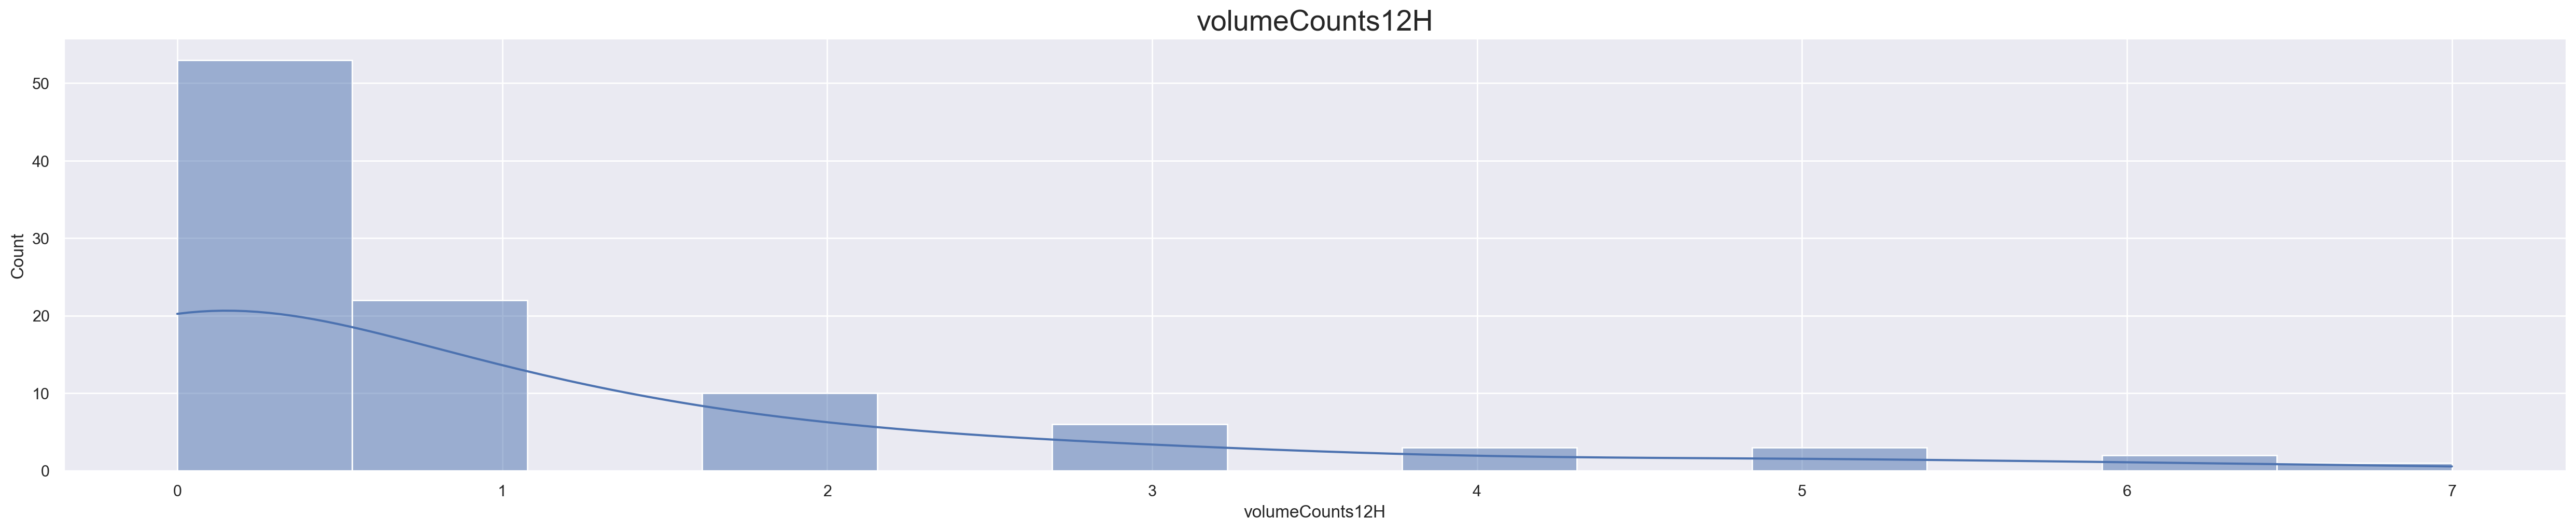

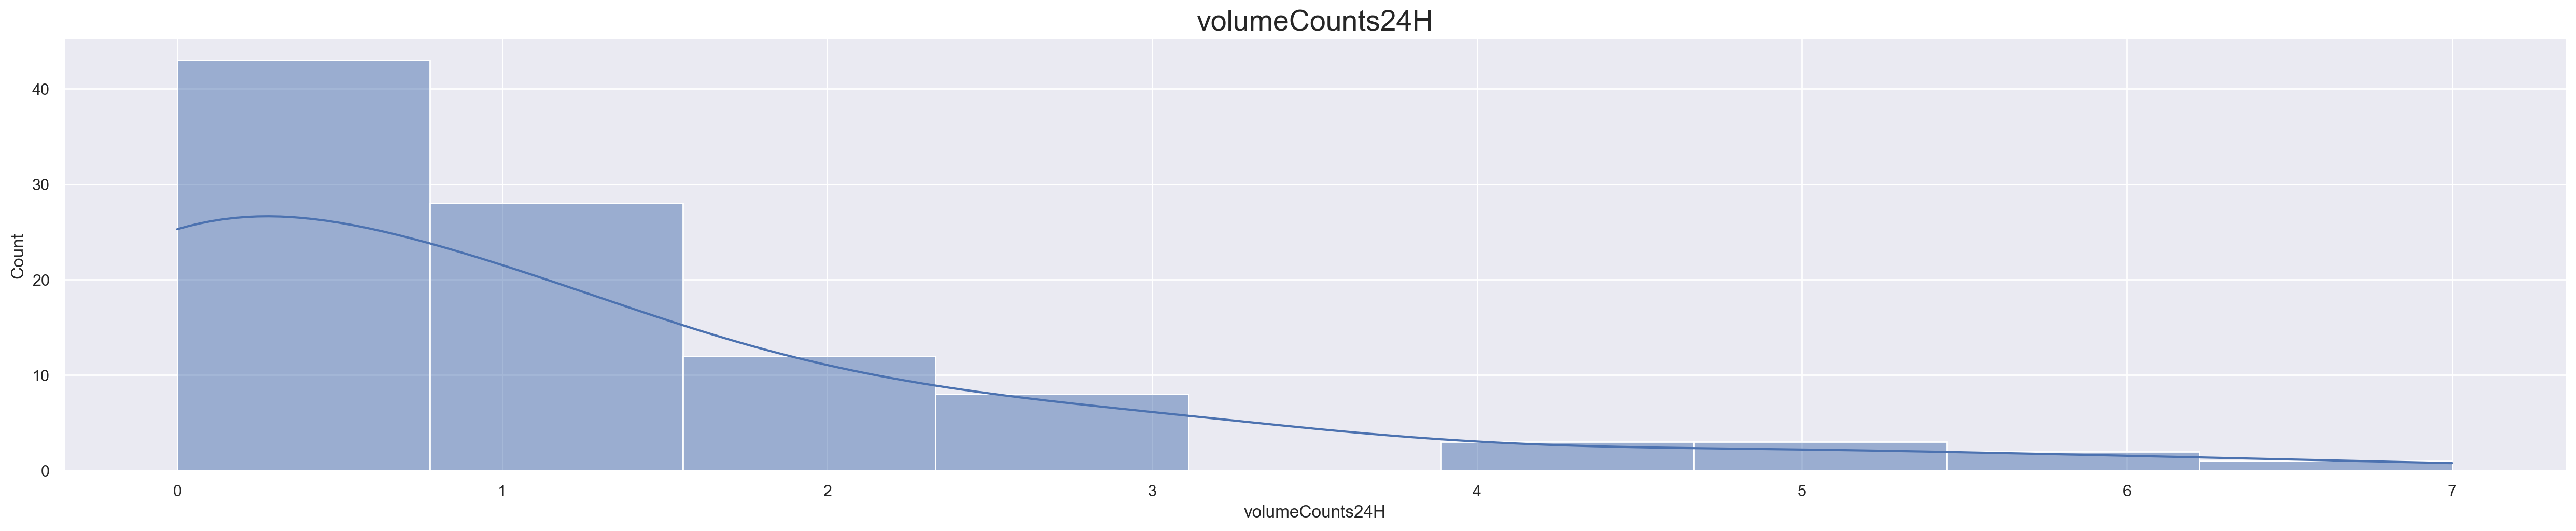

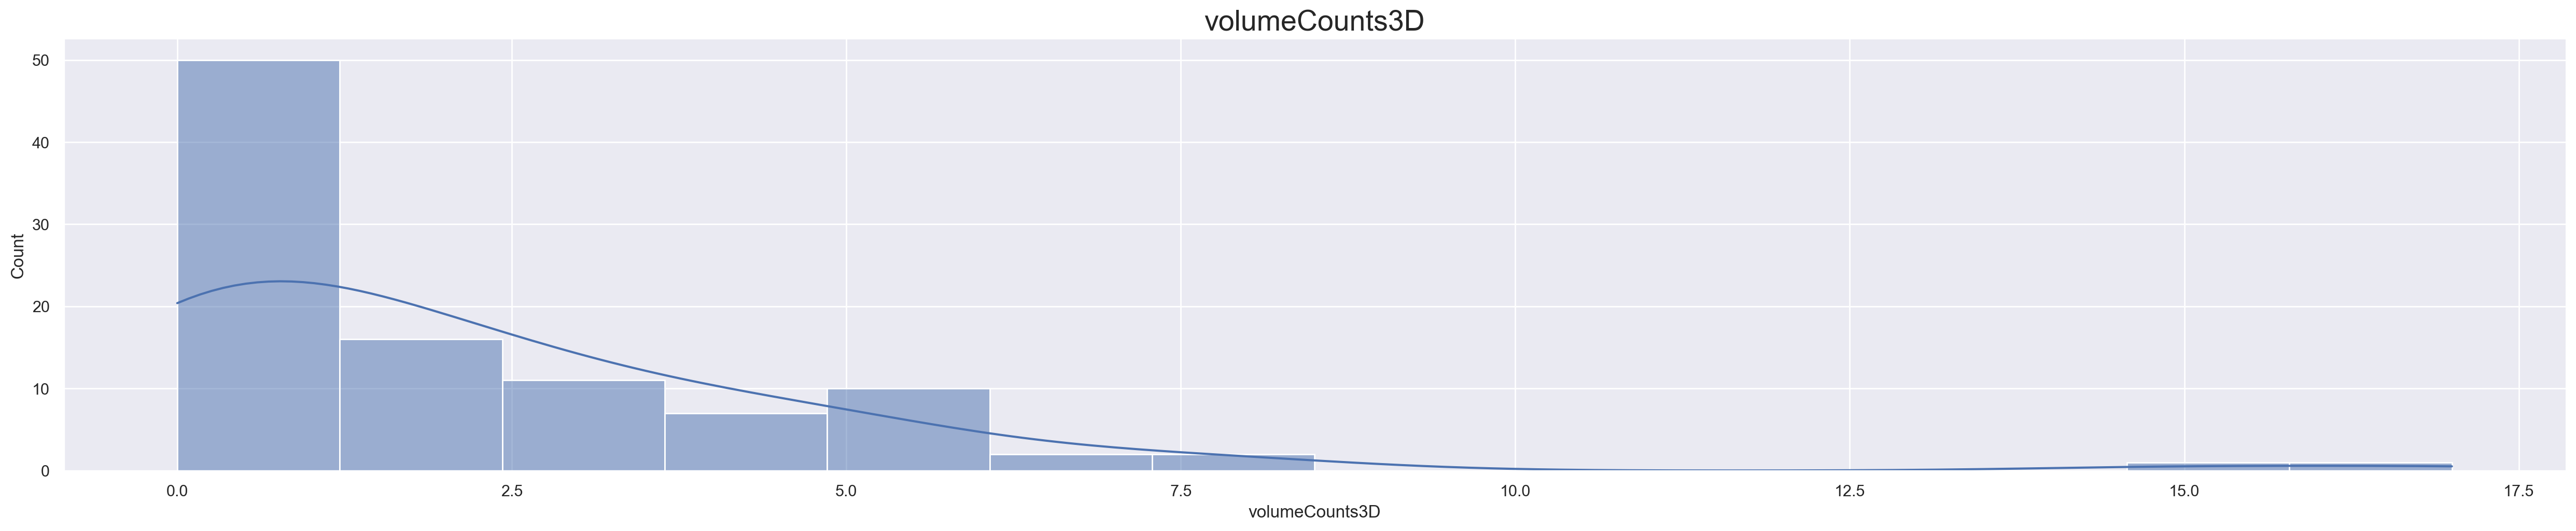

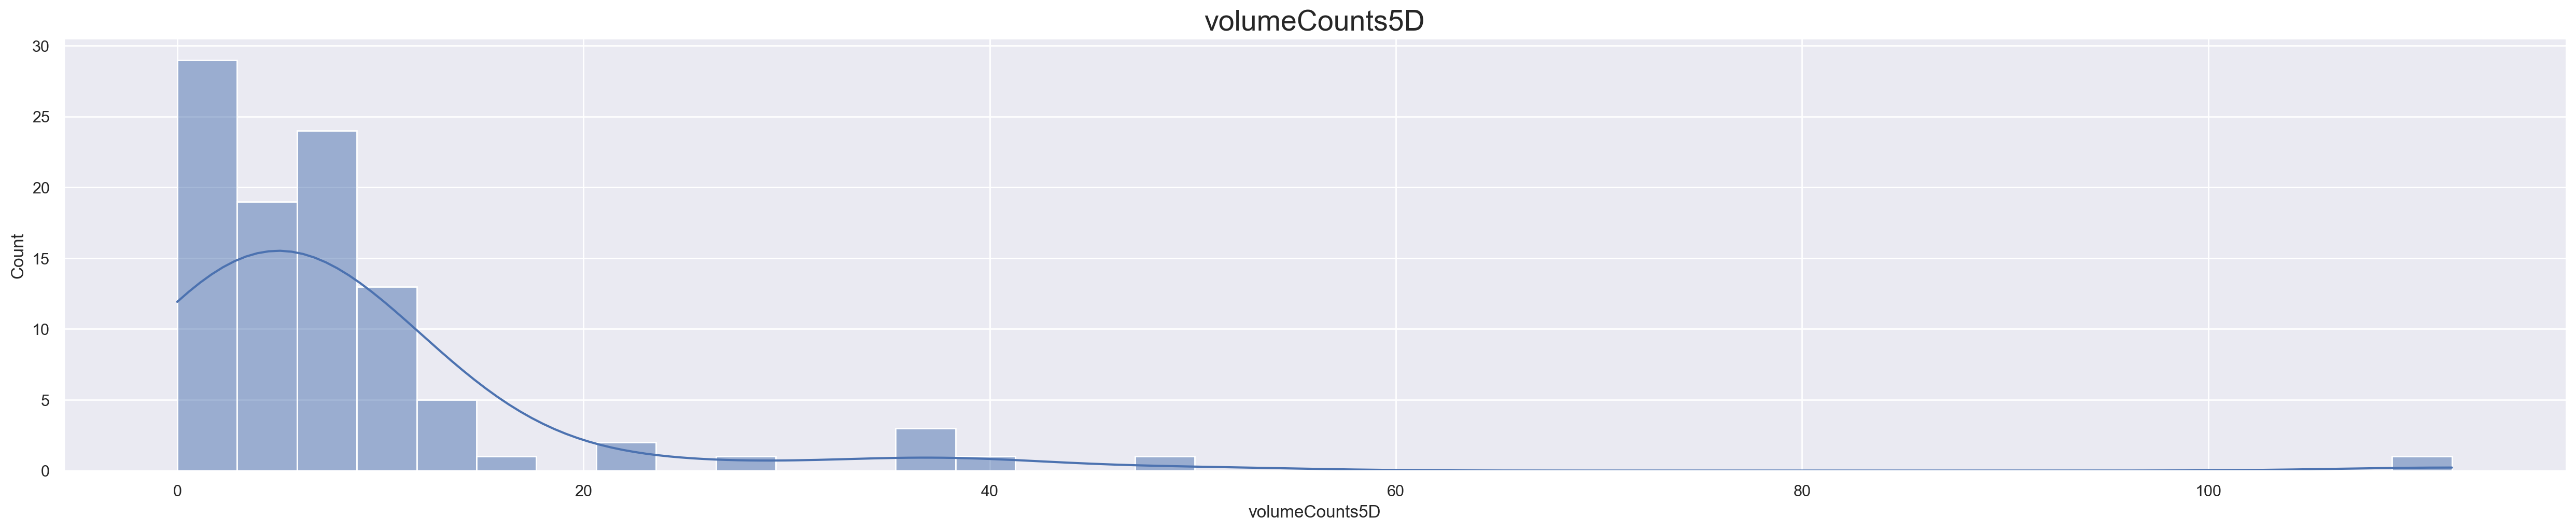

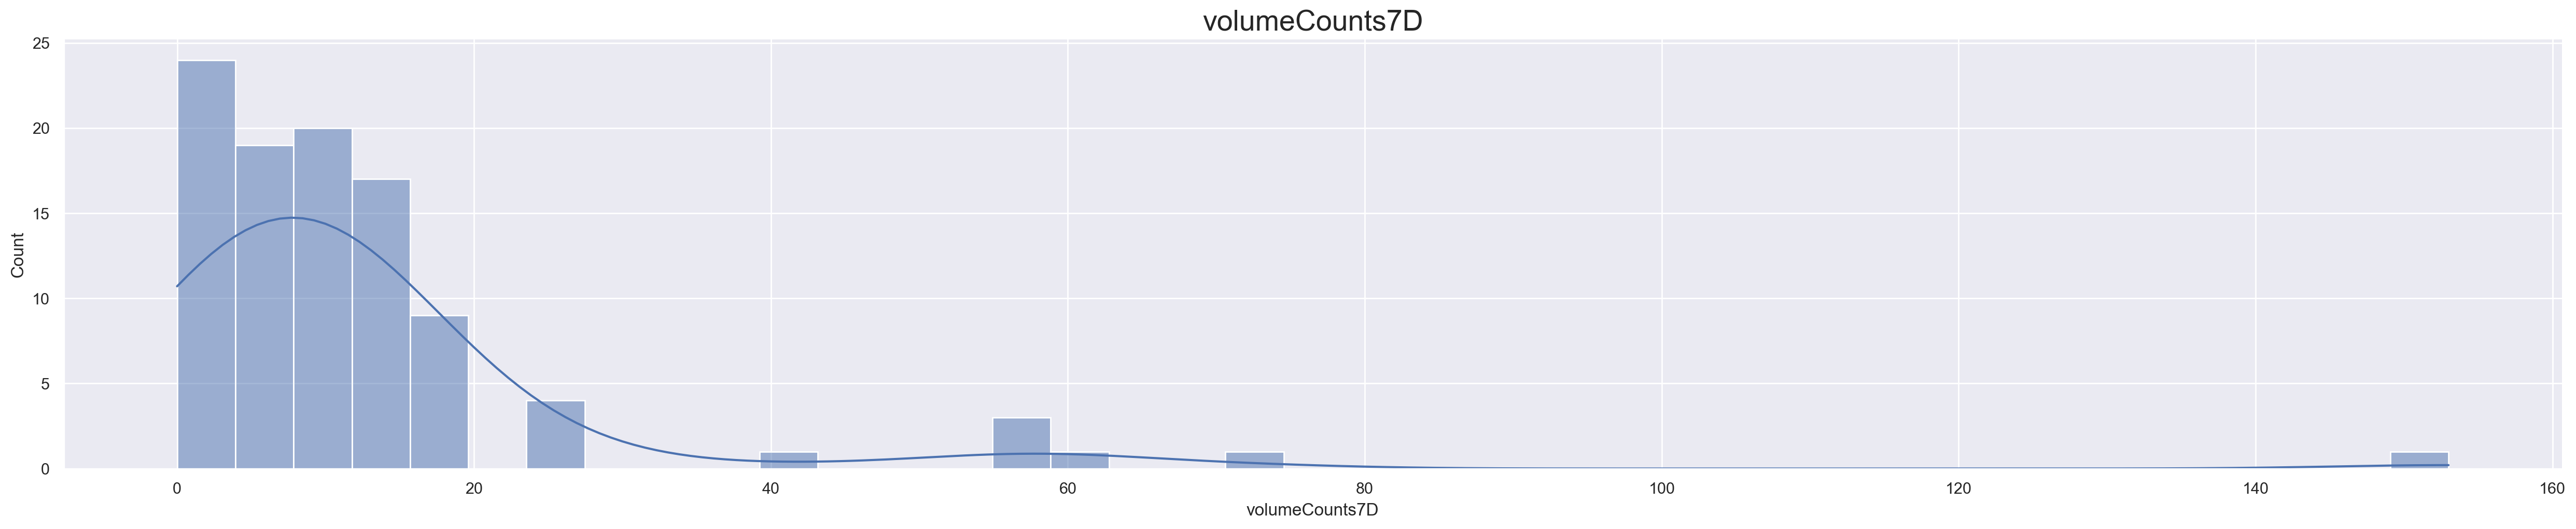

In [172]:
sns.set_theme()
sns.displot(data=dfn, x="volumeCounts12H", kde=True,height=5,aspect=5)
plt.title("volumeCounts12H",fontsize=20)
plt.show()

sns.set_theme()
sns.displot(data=dfn, x="volumeCounts24H", kde=True,height=5,aspect=5)
plt.title("volumeCounts24H",fontsize=20)
plt.show()

sns.set_theme()
sns.displot(data=dfn, x="volumeCounts3D", kde=True,height=5,aspect=5)
plt.title("volumeCounts3D",fontsize=20)
plt.show()

sns.set_theme()
sns.displot(data=dfn, x="volumeCounts5D", kde=True,height=5,aspect=5)
plt.title("volumeCounts5D",fontsize=20)
plt.show()

sns.set_theme()
sns.displot(data=dfn, x="volumeCounts7D", kde=True,height=5,aspect=5)
plt.title("volumeCounts7D",fontsize=20)
plt.show()